# Census Income

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



In [1103]:
#Importing libraries-

In [1104]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing dataset-

In [1105]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [1106]:
df.shape

(32560, 15)

The dataset contains 32560 rows and 15 columns.

In [1107]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Here we can see that our target variable has 2 categories which means this a binary classification problem.

In [1108]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [1109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data set has object and integer data.

# Separating object data colums-

In [1110]:
object=[]

for i in df.columns:
    if df[i].dtypes=='object':
        object.append(i)        

In [1111]:
object

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

# Separating continous data colums-

In [1112]:
continous=[]

for i in df.columns:
    if df[i].dtypes=='int64':
        continous.append(i)        

In [1113]:
continous

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

# Checking for null values in the data set-

In [1114]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

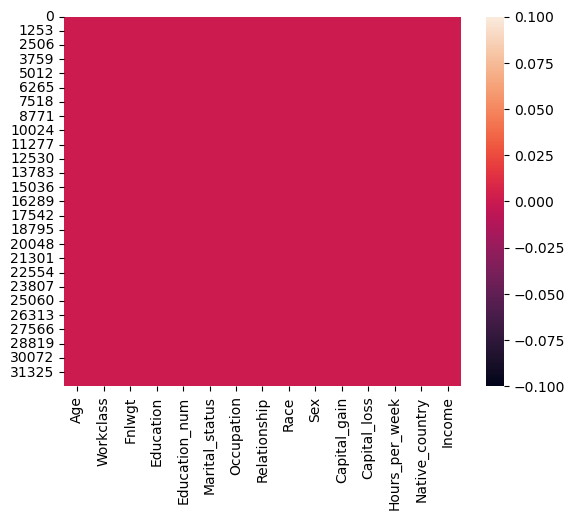

In [1115]:
sns.heatmap(df.isnull())

Here we can see that there are no null values present in the data set.

# Checking for duplicate values in the dataset-

In [1116]:
df.duplicated().sum()

24

There are 24 duplicate values present in the data set which we are needed to remove

# Dropping duplicate values-

In [1117]:
df.drop_duplicates(inplace=True)

In [1118]:
df.duplicated().sum()

0

Here now we can see that we have dropped duplicated values from the dataset.

# Checking no of unique values in the each column-

In [1119]:
df.nunique().to_frame('No of unique values')

No of unique values
Age                              73
Workclass                         9
Fnlwgt                        21647
Education                        16
Education_num                    16
Marital_status                    7
Occupation                       15
Relationship                      6
Race                              5
Sex                               2
Capital_gain                    119
Capital_loss                     92
Hours_per_week                   94
Native_country                   42
Income                            2

# Lets check the value count of the dataset-

In [1120]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

Here we have checked the value counts of each column.

# Statistically data exploration-

In [1121]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

<AxesSubplot:>

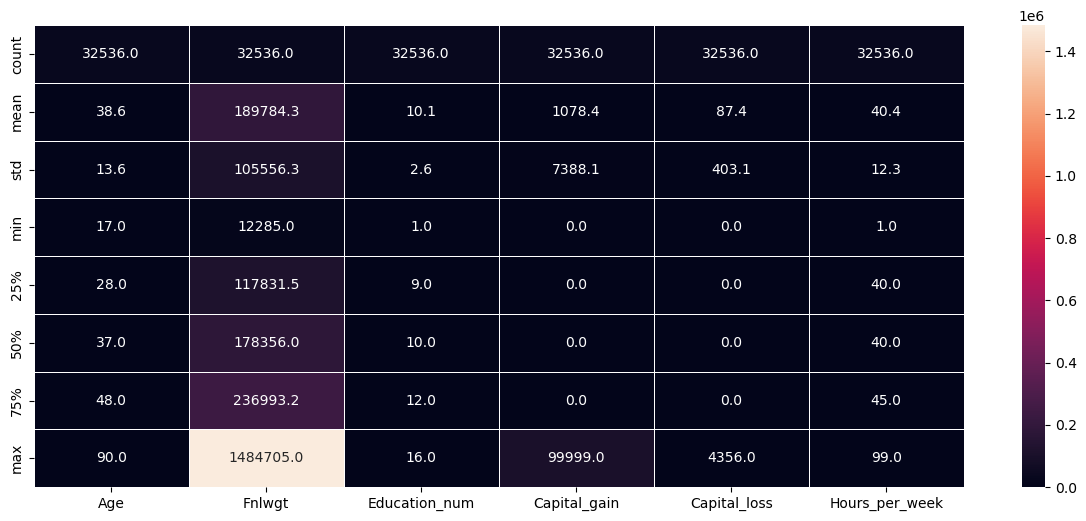

In [1122]:
plt.figure(figsize=(15,6))
sns.heatmap(df.describe(),annot=True,fmt='.1f',linewidth=0.5)

# Observations-

1. The count of all the values are same which means there are no null values present in the dataset.
2. Mean is greater than the median in the columns like Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week which means data may be right skewed in these columns.
3. There is a huge difference in 75% and max value in columns like Age,Capital_gain,Capital_loss,Hours_per_week which means outliers may be present in these columns.

# Exploratory data analysis-

# Univariate analysis-

<AxesSubplot:xlabel='Age', ylabel='Count'>

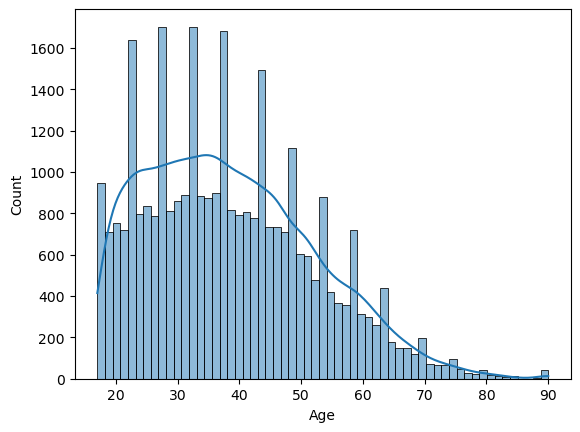

In [976]:
sns.histplot(df['Age'],kde=True)

The age of people are in the range from 15 to 90 years.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

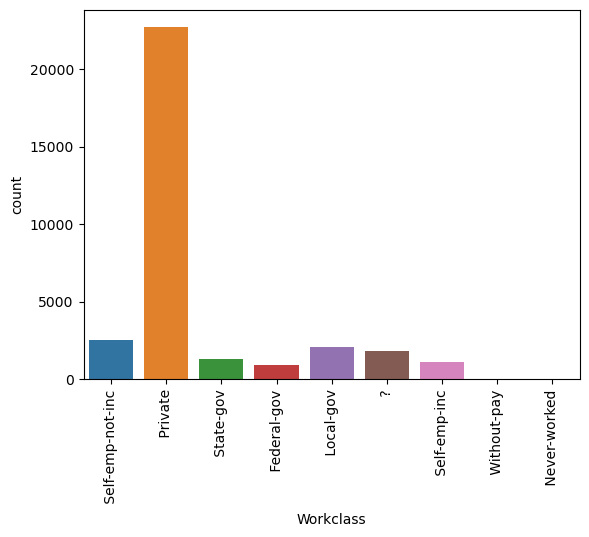

In [977]:
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)

Private job people are higher in numbers and there are no one from without-pay and never worked.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

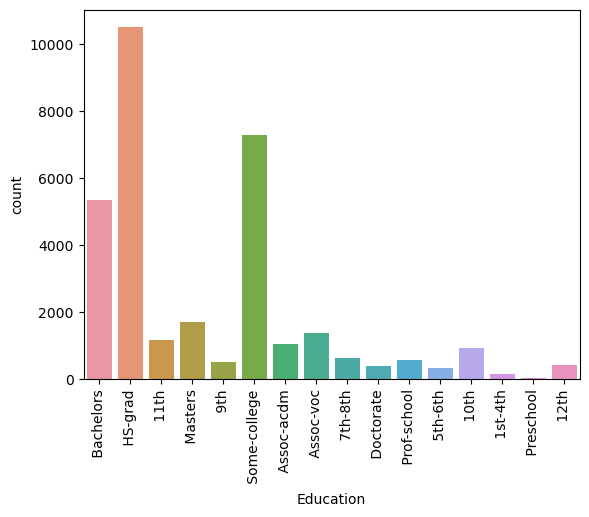

In [978]:
sns.countplot(df['Education'])
plt.xticks(rotation=90)

Peoples from HS-grad are the highest in numbers.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

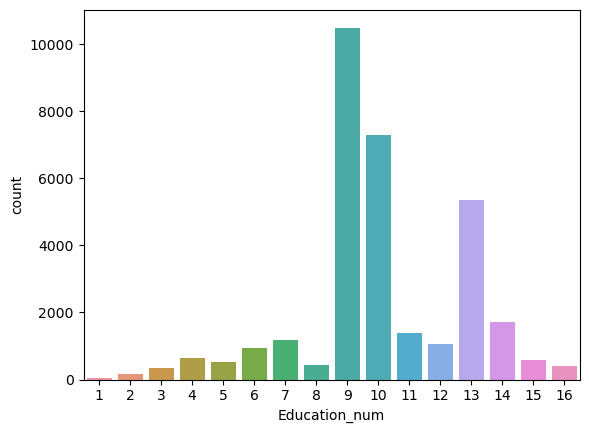

In [979]:
sns.countplot(df['Education_num'])

People with Education_num 9 is highest in number.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

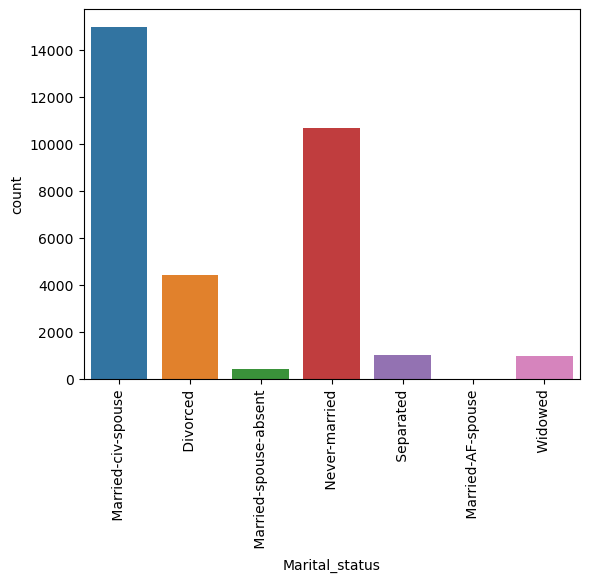

In [980]:
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)

People with Married-civ-spouse are highest in number.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

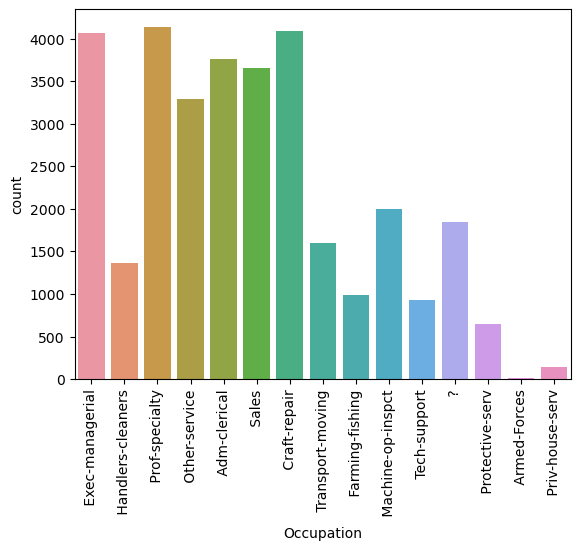

In [981]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)

People with prof-specialty & craft repair occupation are highest in numbers.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

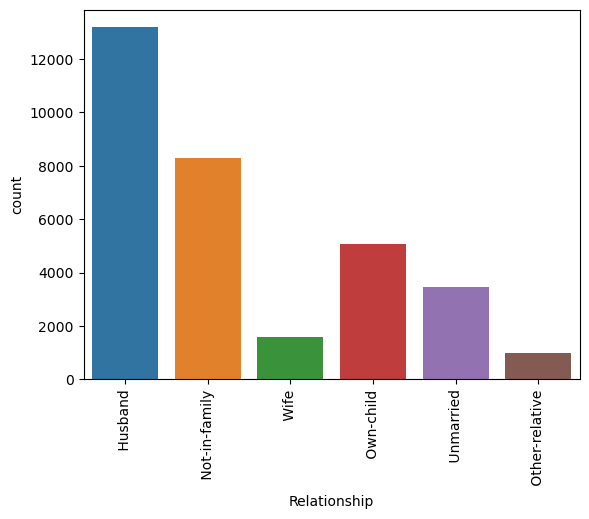

In [982]:
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)

People of husband relationship are highest in numbers.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

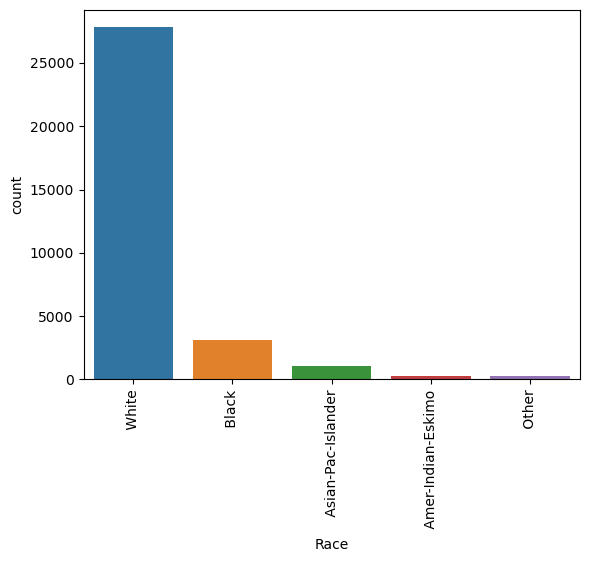

In [983]:
sns.countplot(df['Race'])
plt.xticks(rotation=90)

People with white race are highest in numbers.

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

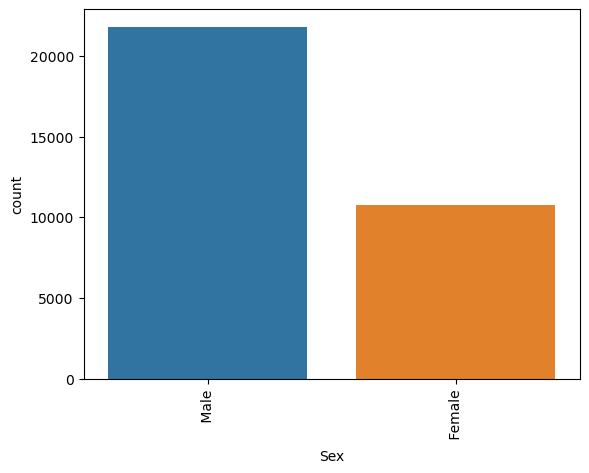

In [984]:
sns.countplot(df['Sex'])
plt.xticks(rotation=90)

Male people are highest in numbers 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

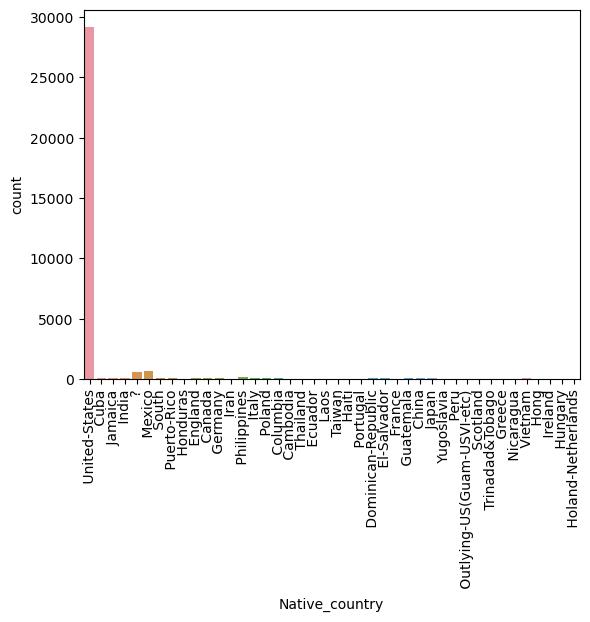

In [985]:
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)

Mexico as native country are highest in numbers.

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

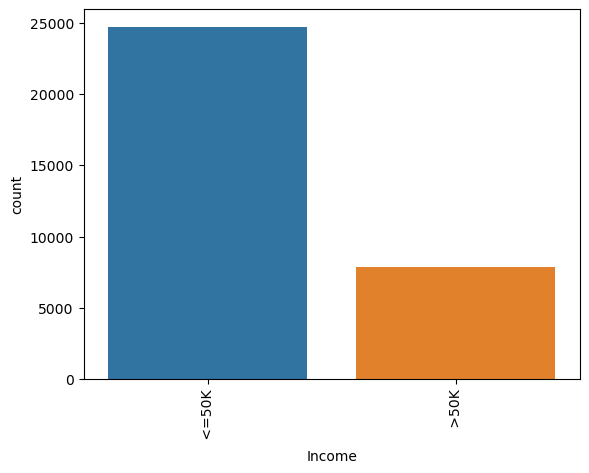

In [986]:
sns.countplot(df['Income'])
plt.xticks(rotation=90)

People with less than equal to 50k are highest in numbers.

# Bivariate Analysis-

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

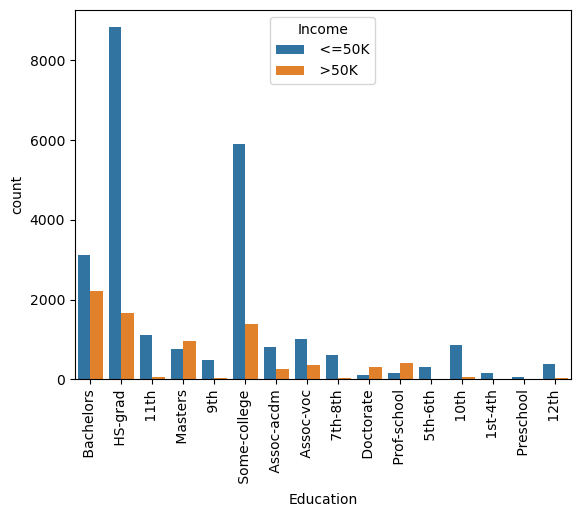

In [987]:
sns.countplot(hue='Income',x='Education',data=df)
plt.xticks(rotation=90)

Most of the People with Education field HS-grad & Some-college and 10th are having income less than equal to 50k.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

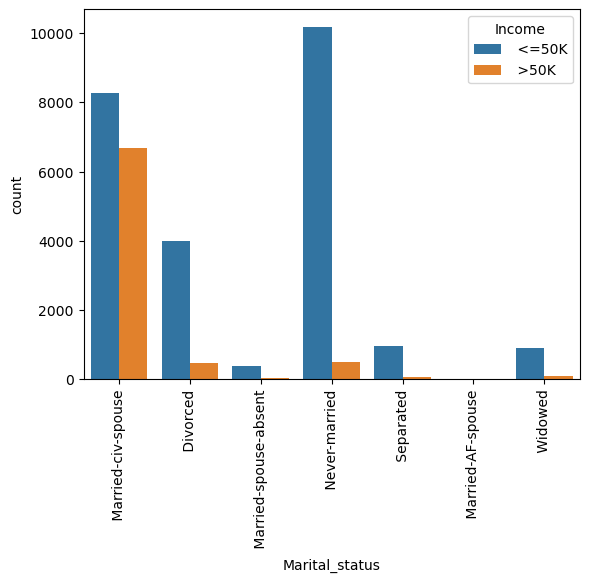

In [988]:
sns.countplot(hue='Income',x='Marital_status',data=df)
plt.xticks(rotation=90)

People having marital status Never-married,separated,widowed,divorced mostly have income less than equal to 50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

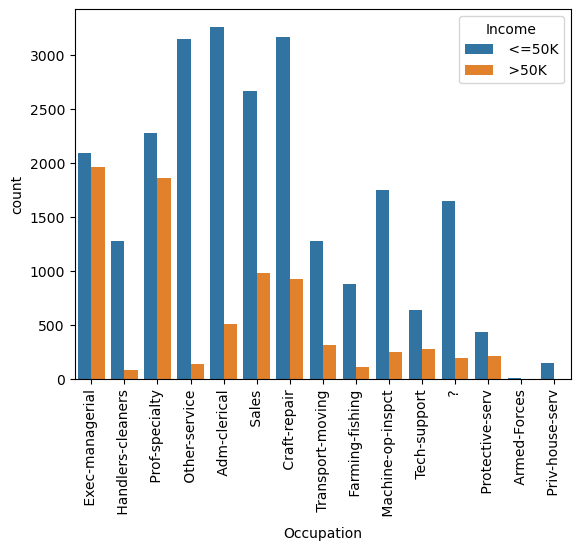

In [989]:
sns.countplot(hue='Income',x='Occupation',data=df)
plt.xticks(rotation=90)

People having occupation as Handlers-cleaners,Other-service,Adm-clerical,Sales,Craft-repair,Transport-moving', ' Farming-fishing', ' Machine-op-inspct,? mostly have income less than equal to 50k.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

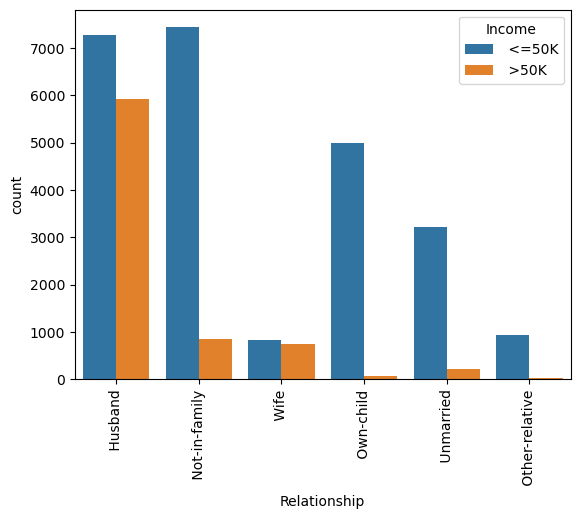

In [990]:
sns.countplot(hue='Income',x='Relationship',data=df)
plt.xticks(rotation=90)

People having relationship as not-in-family,own child,unmarried,other relative mostly have income less than equal to 50k.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

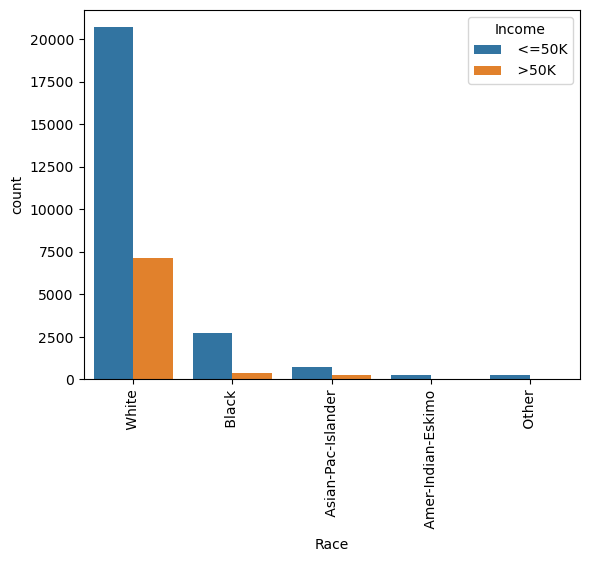

In [991]:
sns.countplot(hue='Income',x='Race',data=df)
plt.xticks(rotation=90)

People with race having white % black are mostly have income less than equal to 50k.

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

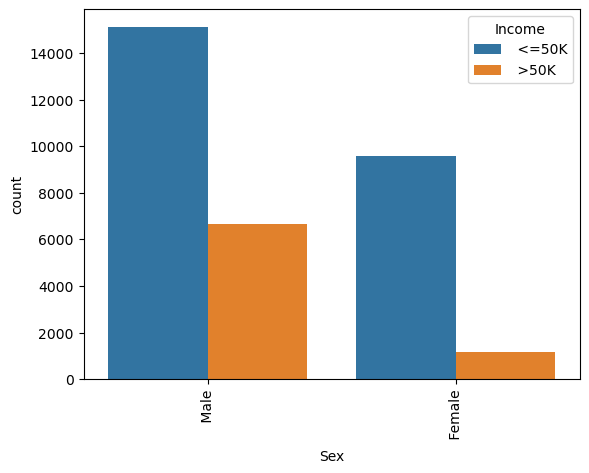

In [992]:
sns.countplot(hue='Income',x='Sex',data=df)
plt.xticks(rotation=90)

males & females both with income less than 50k are high in numbers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

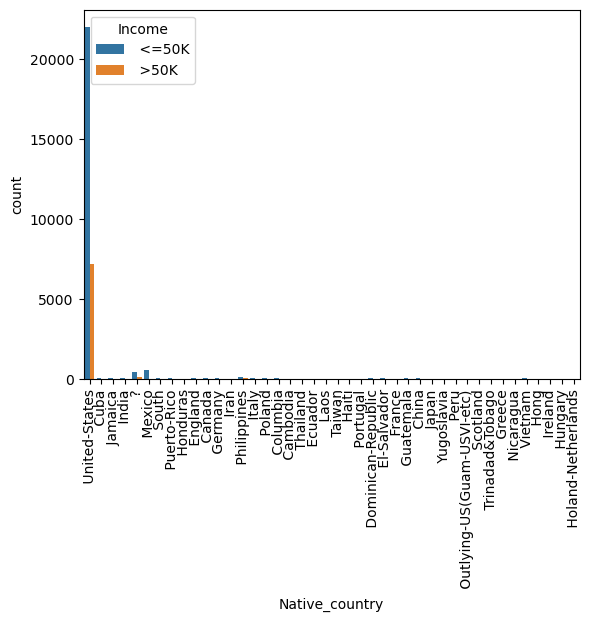

In [993]:
sns.countplot(hue='Income',x='Native_country',data=df)
plt.xticks(rotation=90)

People having US as native contry are mostly have income less than equal to 50k.

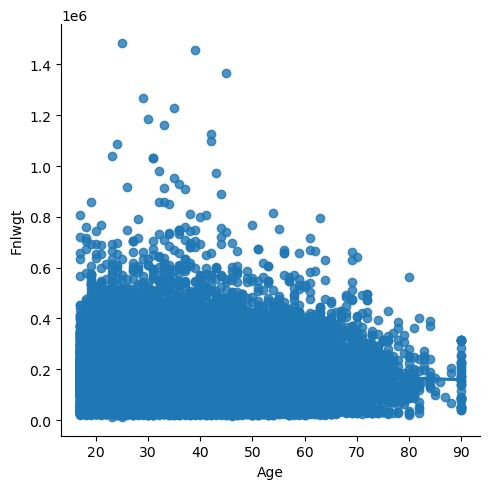

In [994]:
sns.lmplot(x='Age',y='Fnlwgt',data=df)

Age & Fnlwgt do not have any positive relationship with each other.

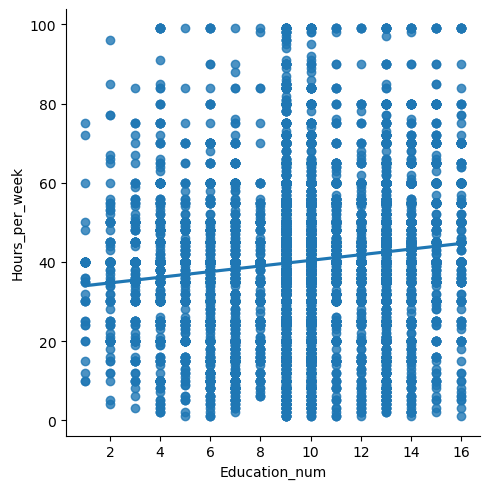

In [995]:
sns.lmplot(x='Education_num',y='Hours_per_week',data=df)

A positive relationship can be seen bw Education_num & Hours_per_week.

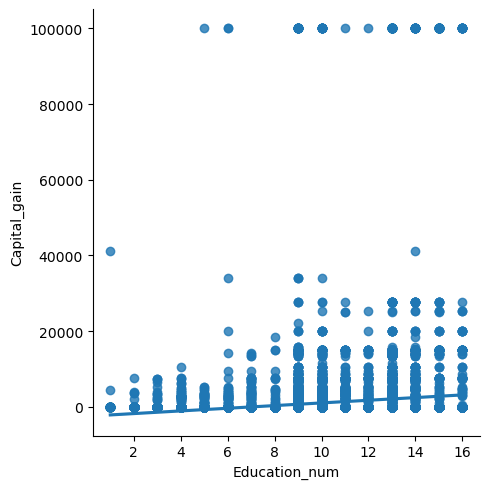

In [996]:
sns.lmplot(x='Education_num',y='Capital_gain',data=df)

A little positive relationship can be seen bw Capital_gain & Education num.

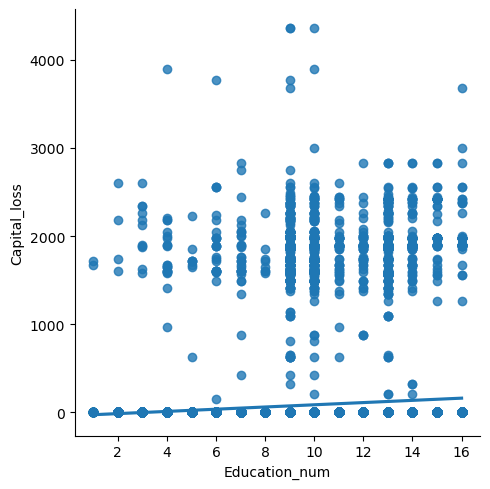

In [997]:
sns.lmplot(x='Education_num',y='Capital_loss',data=df)

a little positive relationship can be seen bw Capital_loss and Education no.

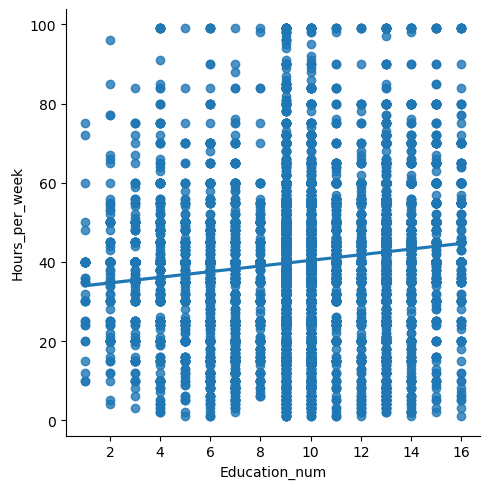

In [998]:
sns.lmplot(x='Education_num',y='Hours_per_week',data=df)

A positive relationship can be seen bw Hours_per_week & education_num.

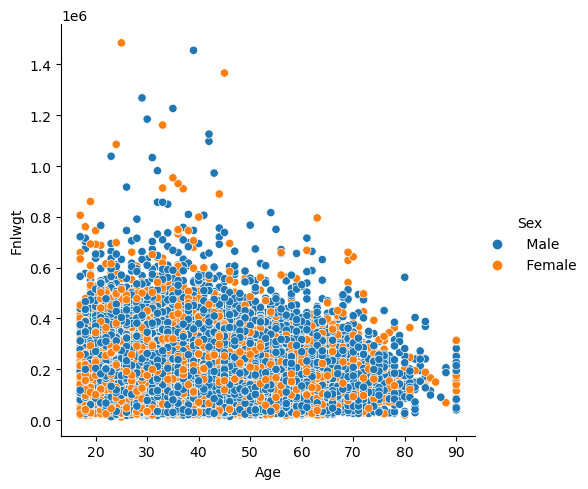

In [999]:
sns.relplot(x='Age', y='Fnlwgt',data=df, hue='Sex')
plt.show()

There is no such high relationship bw age & final weight.

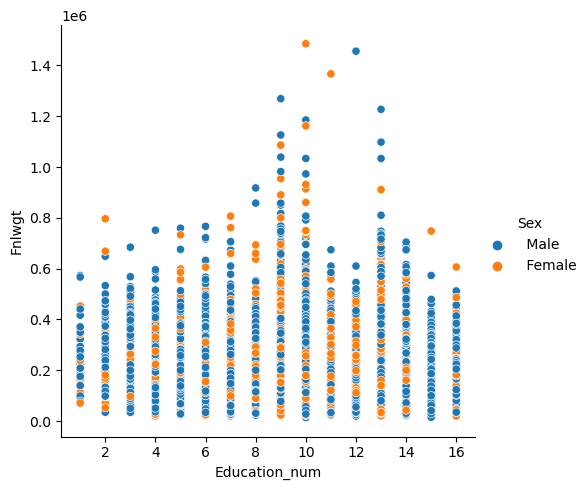

In [1000]:
sns.relplot(x='Education_num', y='Fnlwgt',data=df, hue='Sex')
plt.show()

Final weights are higher for Education_num bw 9 to 13.

# Correlationship matrix-

Text(0.5, 1.0, 'Correlationship among columns')

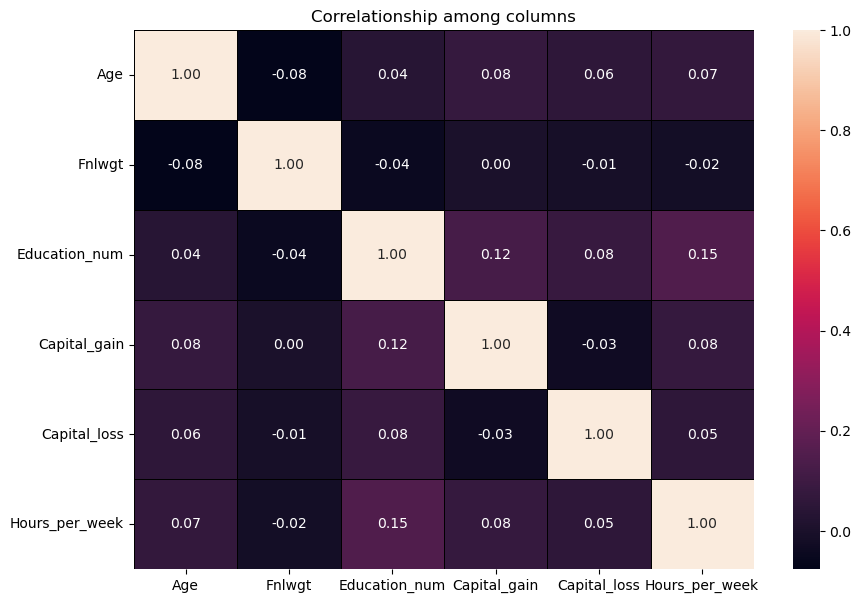

In [1123]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=.5,linecolor='Black')
plt.title('Correlationship among columns')

# Observations-

1. Age & Fnlwgt have negetive correlationship of 8% with each other.
2. A positive correlationship of 15% can be seen bw Hours_per_week & education_num.
3. A positive correlationship of 12% can be seen bw Capital_gain & education_num.

# Checking distribution of data in numeric data columns-

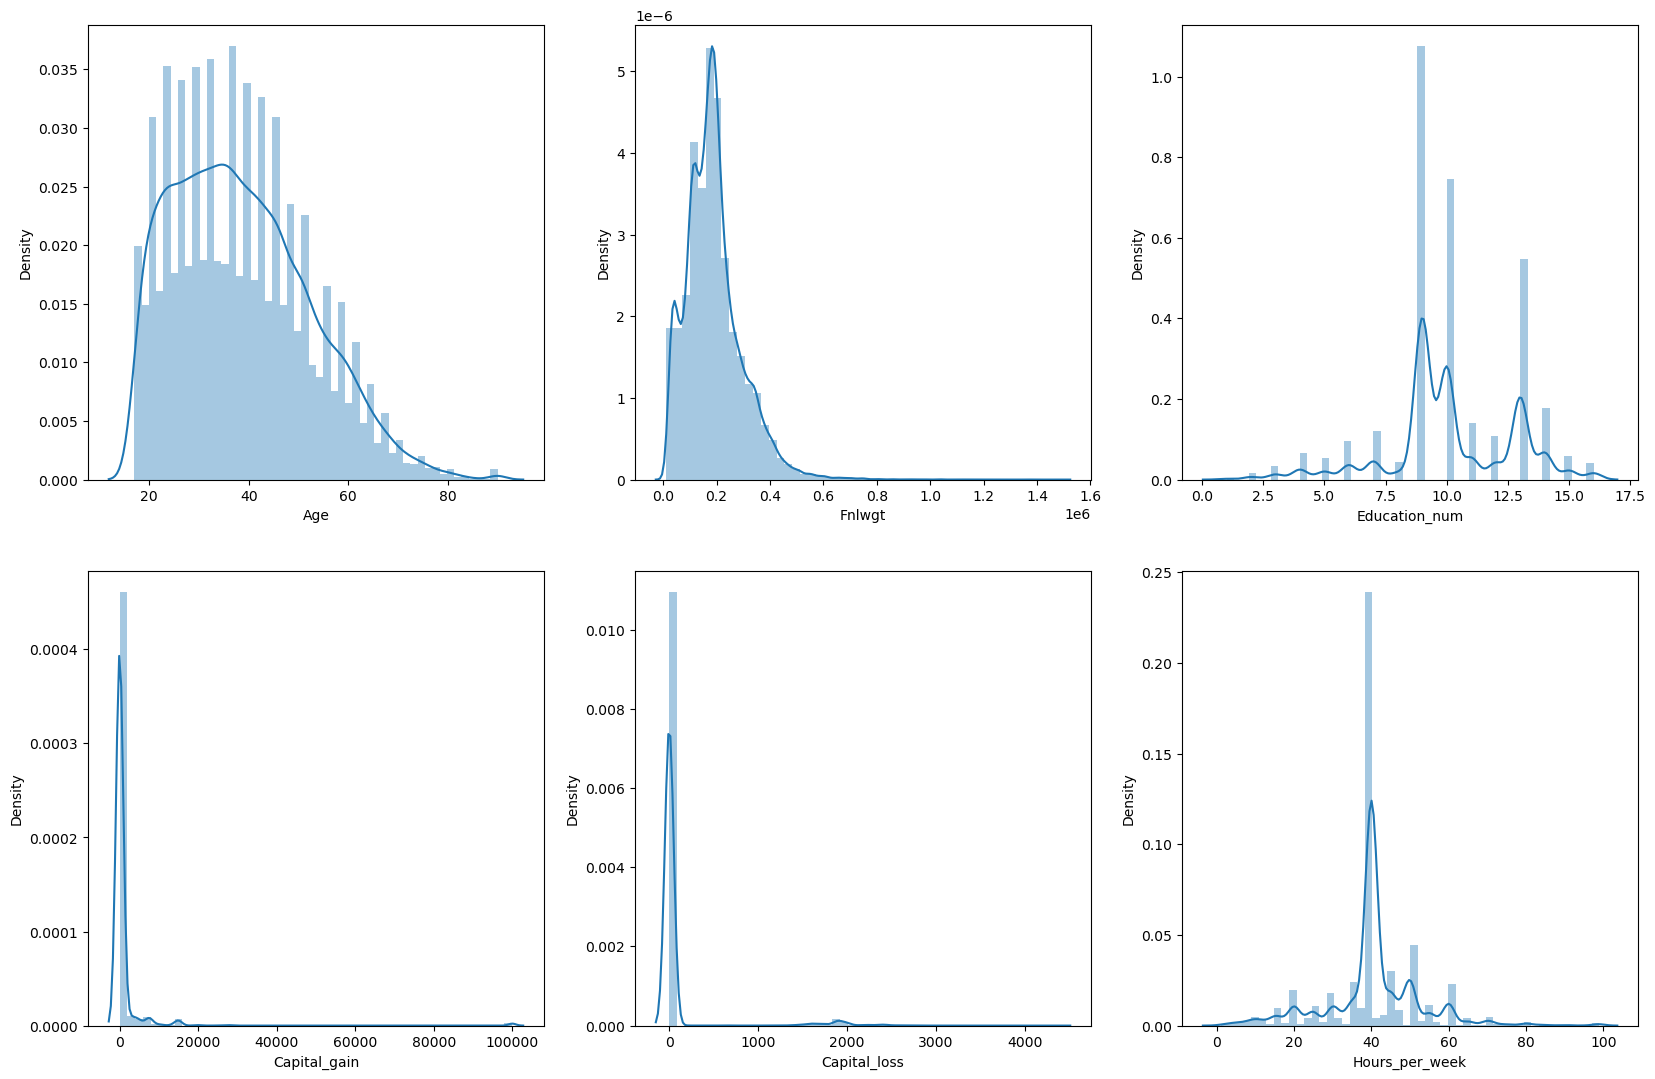

In [1124]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

# Checking skewness of the data-

In [1125]:
df[continous].skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

Here we can see that skewness is above acceptable range i.e. bw -0.5 to 0.5 in columns like Age,Fnlwgt,Capital_gain,Capital_loss

# Removal of skewness through Power transformer method-

In [1126]:
from sklearn.preprocessing import PowerTransformer

In [1127]:
features=['Age','Fnlwgt','Capital_gain','Capital_loss']

In [1128]:
x=PowerTransformer(method='yeo-johnson') 
df[features]=x.fit_transform(df[features].values)

In [1129]:
df[continous].skew()

Age              -0.013967
Fnlwgt            0.016961
Education_num    -0.309454
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
dtype: float64

Now we can see that skewness has been reduced.

# Checking for the outliers throgh box-plot-

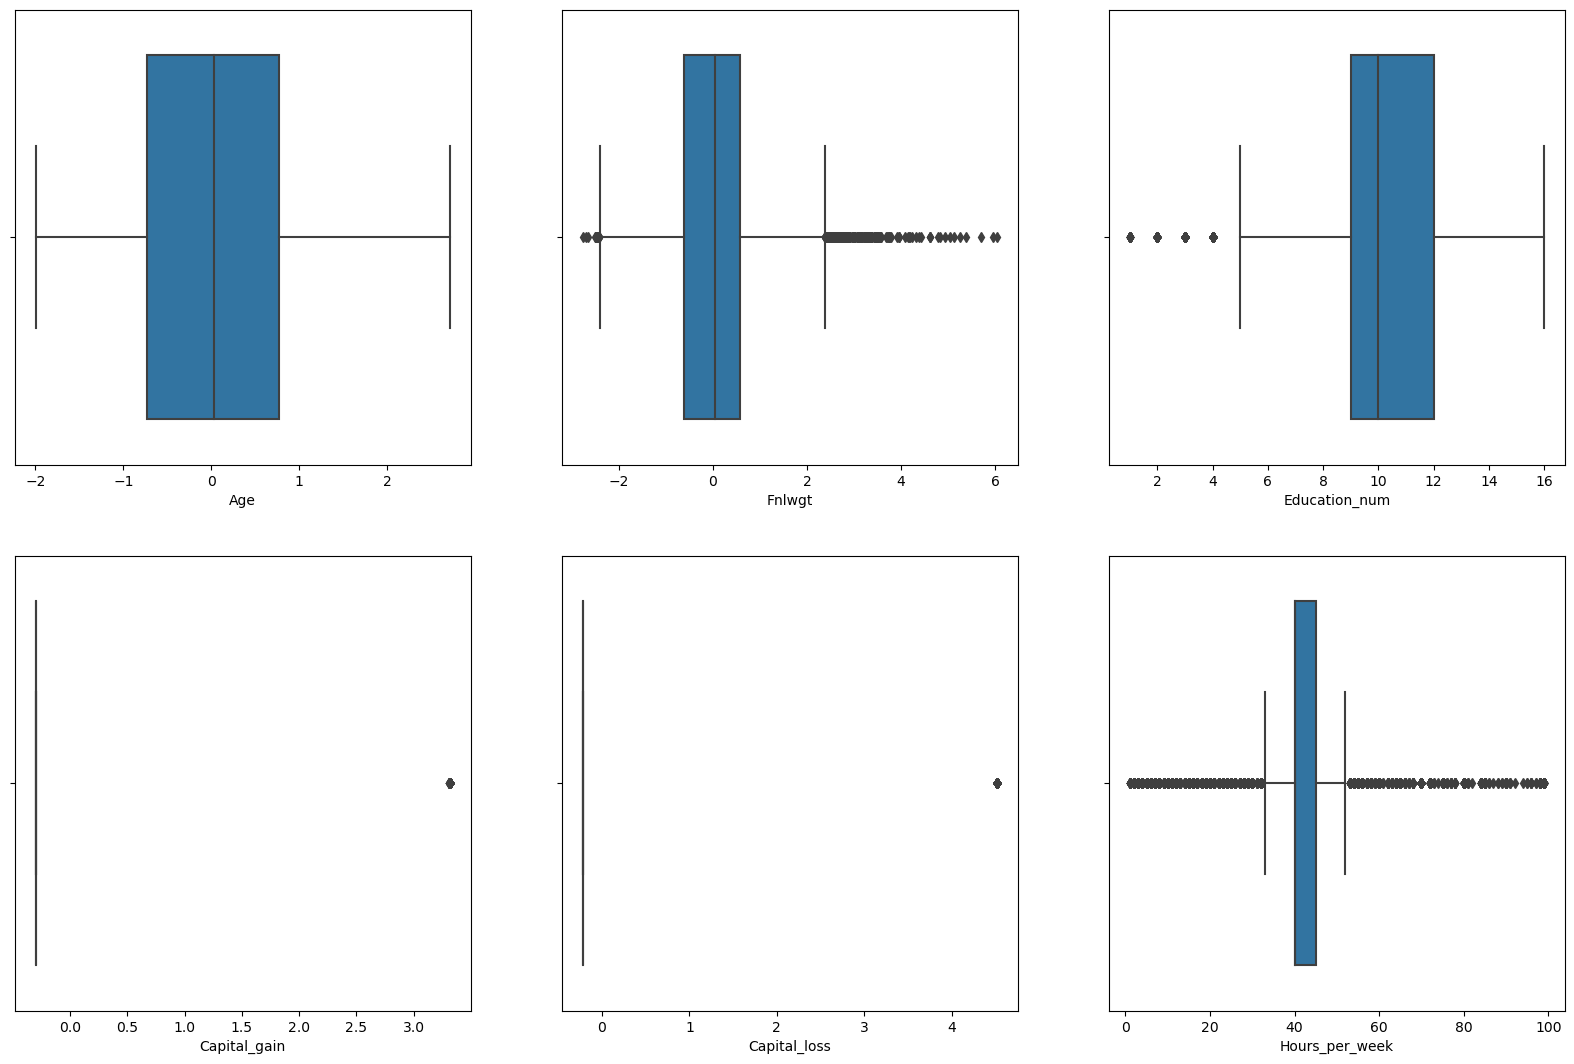

In [1130]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

Here we can see that outliers are present in the columns like Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week.

# Outliers removal through IQR method-

In [1131]:
#upper side outliers-q3+(1.5*IQR)
#lower side outliers-q1-(1.5*IQR)


q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

In [1132]:
Fnlwgt_high=(q3.Fnlwgt+(1.5*IQR.Fnlwgt))


index=np.where(df['Fnlwgt']> Fnlwgt_high)

df=df.drop(df.index[index])
df

Age          Workclass    Fnlwgt    Education  Education_num  \
0      0.891733   Self-emp-not-inc -1.089960    Bachelors             13   
1      0.102259            Private  0.398771      HS-grad              9   
2      1.064242            Private  0.562562         11th              7   
3     -0.732199            Private  1.340353    Bachelors             13   
4      0.027550            Private  0.957178      Masters             14   
...         ...                ...       ...          ...            ...   
32555 -0.828514            Private  0.746761   Assoc-acdm             12   
32556  0.246949            Private -0.193274      HS-grad              9   
32557  1.334550            Private -0.219732      HS-grad              9   
32558 -1.358807            Private  0.271699      HS-grad              9   
32559  1.007659       Self-emp-inc  0.982158      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male     -0.301491     -0.221299              13   United-States   
1         Male     -0.301491     -0.221299              40   United-States   
2         Male     -0.301491     -0.221299              40   United-States   
3       Female     -0.301491     -0.221299              40            Cuba   
4       Female     -0.301491     -0.221299              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female     -0.301491     -0.221299              38   United-States   
32556     Male     -0.301491     -0.221299              40   United-States   
32557   Female     -0.301491     -0.221299              40   United-States   
32558     Male     -0.301491     -0.221299              20   United-States   
32559   Female      3.316900     -0.221299              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32218 rows x 15 columns]

In [1133]:
Capital_gain_high=(q3.Capital_gain+(1.5*IQR.Capital_gain))


index=np.where(df['Capital_gain']> Capital_gain_high)

df=df.drop(df.index[index])
df

Age          Workclass    Fnlwgt      Education  Education_num  \
0      0.891733   Self-emp-not-inc -1.089960      Bachelors             13   
1      0.102259            Private  0.398771        HS-grad              9   
2      1.064242            Private  0.562562           11th              7   
3     -0.732199            Private  1.340353      Bachelors             13   
4      0.027550            Private  0.957178        Masters             14   
...         ...                ...       ...            ...            ...   
32554 -1.358807            Private  1.144012   Some-college             10   
32555 -0.828514            Private  0.746761     Assoc-acdm             12   
32556  0.246949            Private -0.193274        HS-grad              9   
32557  1.334550            Private -0.219732        HS-grad              9   
32558 -1.358807            Private  0.271699        HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32554        Never-married     Protective-serv   Not-in-family   White   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male     -0.301491     -0.221299              13   United-States   
1         Male     -0.301491     -0.221299              40   United-States   
2         Male     -0.301491     -0.221299              40   United-States   
3       Female     -0.301491     -0.221299              40            Cuba   
4       Female     -0.301491     -0.221299              40   United-States   
...        ...           ...           ...             ...             ...   
32554     Male     -0.301491     -0.221299              40   United-States   
32555   Female     -0.301491     -0.221299              38   United-States   
32556     Male     -0.301491     -0.221299              40   United-States   
32557   Female     -0.301491     -0.221299              40   United-States   
32558     Male     -0.301491     -0.221299              20   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32554   <=50K  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  

[29534 rows x 15 columns]

In [1134]:
Capital_loss_high=(q3.Capital_loss+(1.5*IQR.Capital_loss))


index=np.where(df['Capital_loss']> Capital_loss_high)

df=df.drop(df.index[index])
df

Age          Workclass    Fnlwgt      Education  Education_num  \
0      0.891733   Self-emp-not-inc -1.089960      Bachelors             13   
1      0.102259            Private  0.398771        HS-grad              9   
2      1.064242            Private  0.562562           11th              7   
3     -0.732199            Private  1.340353      Bachelors             13   
4      0.027550            Private  0.957178        Masters             14   
...         ...                ...       ...            ...            ...   
32554 -1.358807            Private  1.144012   Some-college             10   
32555 -0.828514            Private  0.746761     Assoc-acdm             12   
32556  0.246949            Private -0.193274        HS-grad              9   
32557  1.334550            Private -0.219732        HS-grad              9   
32558 -1.358807            Private  0.271699        HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32554        Never-married     Protective-serv   Not-in-family   White   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male     -0.301491     -0.221299              13   United-States   
1         Male     -0.301491     -0.221299              40   United-States   
2         Male     -0.301491     -0.221299              40   United-States   
3       Female     -0.301491     -0.221299              40            Cuba   
4       Female     -0.301491     -0.221299              40   United-States   
...        ...           ...           ...             ...             ...   
32554     Male     -0.301491     -0.221299              40   United-States   
32555   Female     -0.301491     -0.221299              38   United-States   
32556     Male     -0.301491     -0.221299              40   United-States   
32557   Female     -0.301491     -0.221299              40   United-States   
32558     Male     -0.301491     -0.221299              20   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32554   <=50K  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  

[28024 rows x 15 columns]

In [1135]:
Fnlwgt_low=q1.Fnlwgt-(1.5*IQR.Fnlwgt)

index=np.where(df['Fnlwgt']<Fnlwgt_low)

df=df.drop(df.index[index])
df

Age          Workclass    Fnlwgt      Education  Education_num  \
0      0.891733   Self-emp-not-inc -1.089960      Bachelors             13   
1      0.102259            Private  0.398771        HS-grad              9   
2      1.064242            Private  0.562562           11th              7   
3     -0.732199            Private  1.340353      Bachelors             13   
4      0.027550            Private  0.957178        Masters             14   
...         ...                ...       ...            ...            ...   
32554 -1.358807            Private  1.144012   Some-college             10   
32555 -0.828514            Private  0.746761     Assoc-acdm             12   
32556  0.246949            Private -0.193274        HS-grad              9   
32557  1.334550            Private -0.219732        HS-grad              9   
32558 -1.358807            Private  0.271699        HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32554        Never-married     Protective-serv   Not-in-family   White   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male     -0.301491     -0.221299              13   United-States   
1         Male     -0.301491     -0.221299              40   United-States   
2         Male     -0.301491     -0.221299              40   United-States   
3       Female     -0.301491     -0.221299              40            Cuba   
4       Female     -0.301491     -0.221299              40   United-States   
...        ...           ...           ...             ...             ...   
32554     Male     -0.301491     -0.221299              40   United-States   
32555   Female     -0.301491     -0.221299              38   United-States   
32556     Male     -0.301491     -0.221299              40   United-States   
32557   Female     -0.301491     -0.221299              40   United-States   
32558     Male     -0.301491     -0.221299              20   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32554   <=50K  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  

[27976 rows x 15 columns]

In [1136]:
Education_num_low=q1.Education_num-(1.5*IQR.Education_num)

index=np.where(df['Education_num']<Education_num_low)

df=df.drop(df.index[index])
df

Age          Workclass    Fnlwgt      Education  Education_num  \
0      0.891733   Self-emp-not-inc -1.089960      Bachelors             13   
1      0.102259            Private  0.398771        HS-grad              9   
2      1.064242            Private  0.562562           11th              7   
3     -0.732199            Private  1.340353      Bachelors             13   
4      0.027550            Private  0.957178        Masters             14   
...         ...                ...       ...            ...            ...   
32554 -1.358807            Private  1.144012   Some-college             10   
32555 -0.828514            Private  0.746761     Assoc-acdm             12   
32556  0.246949            Private -0.193274        HS-grad              9   
32557  1.334550            Private -0.219732        HS-grad              9   
32558 -1.358807            Private  0.271699        HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32554        Never-married     Protective-serv   Not-in-family   White   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male     -0.301491     -0.221299              13   United-States   
1         Male     -0.301491     -0.221299              40   United-States   
2         Male     -0.301491     -0.221299              40   United-States   
3       Female     -0.301491     -0.221299              40            Cuba   
4       Female     -0.301491     -0.221299              40   United-States   
...        ...           ...           ...             ...             ...   
32554     Male     -0.301491     -0.221299              40   United-States   
32555   Female     -0.301491     -0.221299              38   United-States   
32556     Male     -0.301491     -0.221299              40   United-States   
32557   Female     -0.301491     -0.221299              40   United-States   
32558     Male     -0.301491     -0.221299              20   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32554   <=50K  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  

[26902 rows x 15 columns]

# Checking outliers again after removal of outliers-

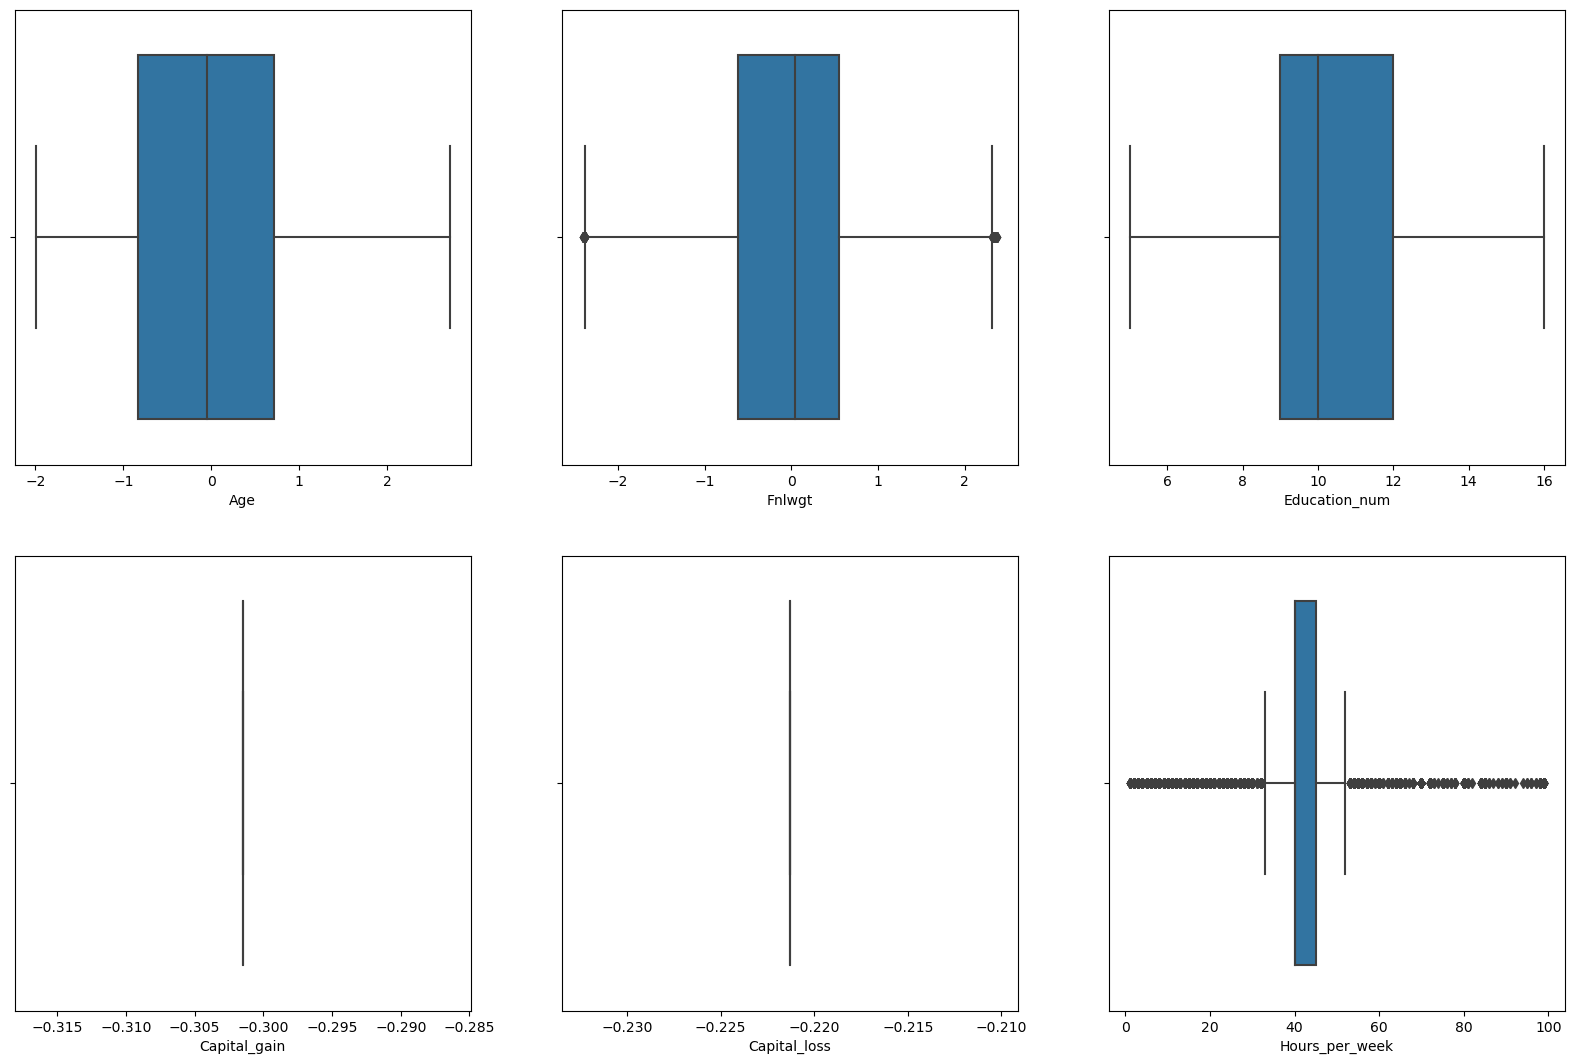

In [1137]:
plt.figure(figsize=(20,13))
plotnumber=1

for col in continous:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.yticks(rotation=0)
    plotnumber+=1
plt.show()   

Here now we can see that we have almost removed the outliers from all the column which had outliers. we are not worried about the outliers 
in Hours_per_week column as this looks like a categorical column.

Here we can see that we have lost almost 23% data but we can afford here to lose some data as we have suffiecient amount of data and it was the necesity of the time to remove complete outliers from the data so that overfitting of the model doesnt happen.

# Multivariate analysis-

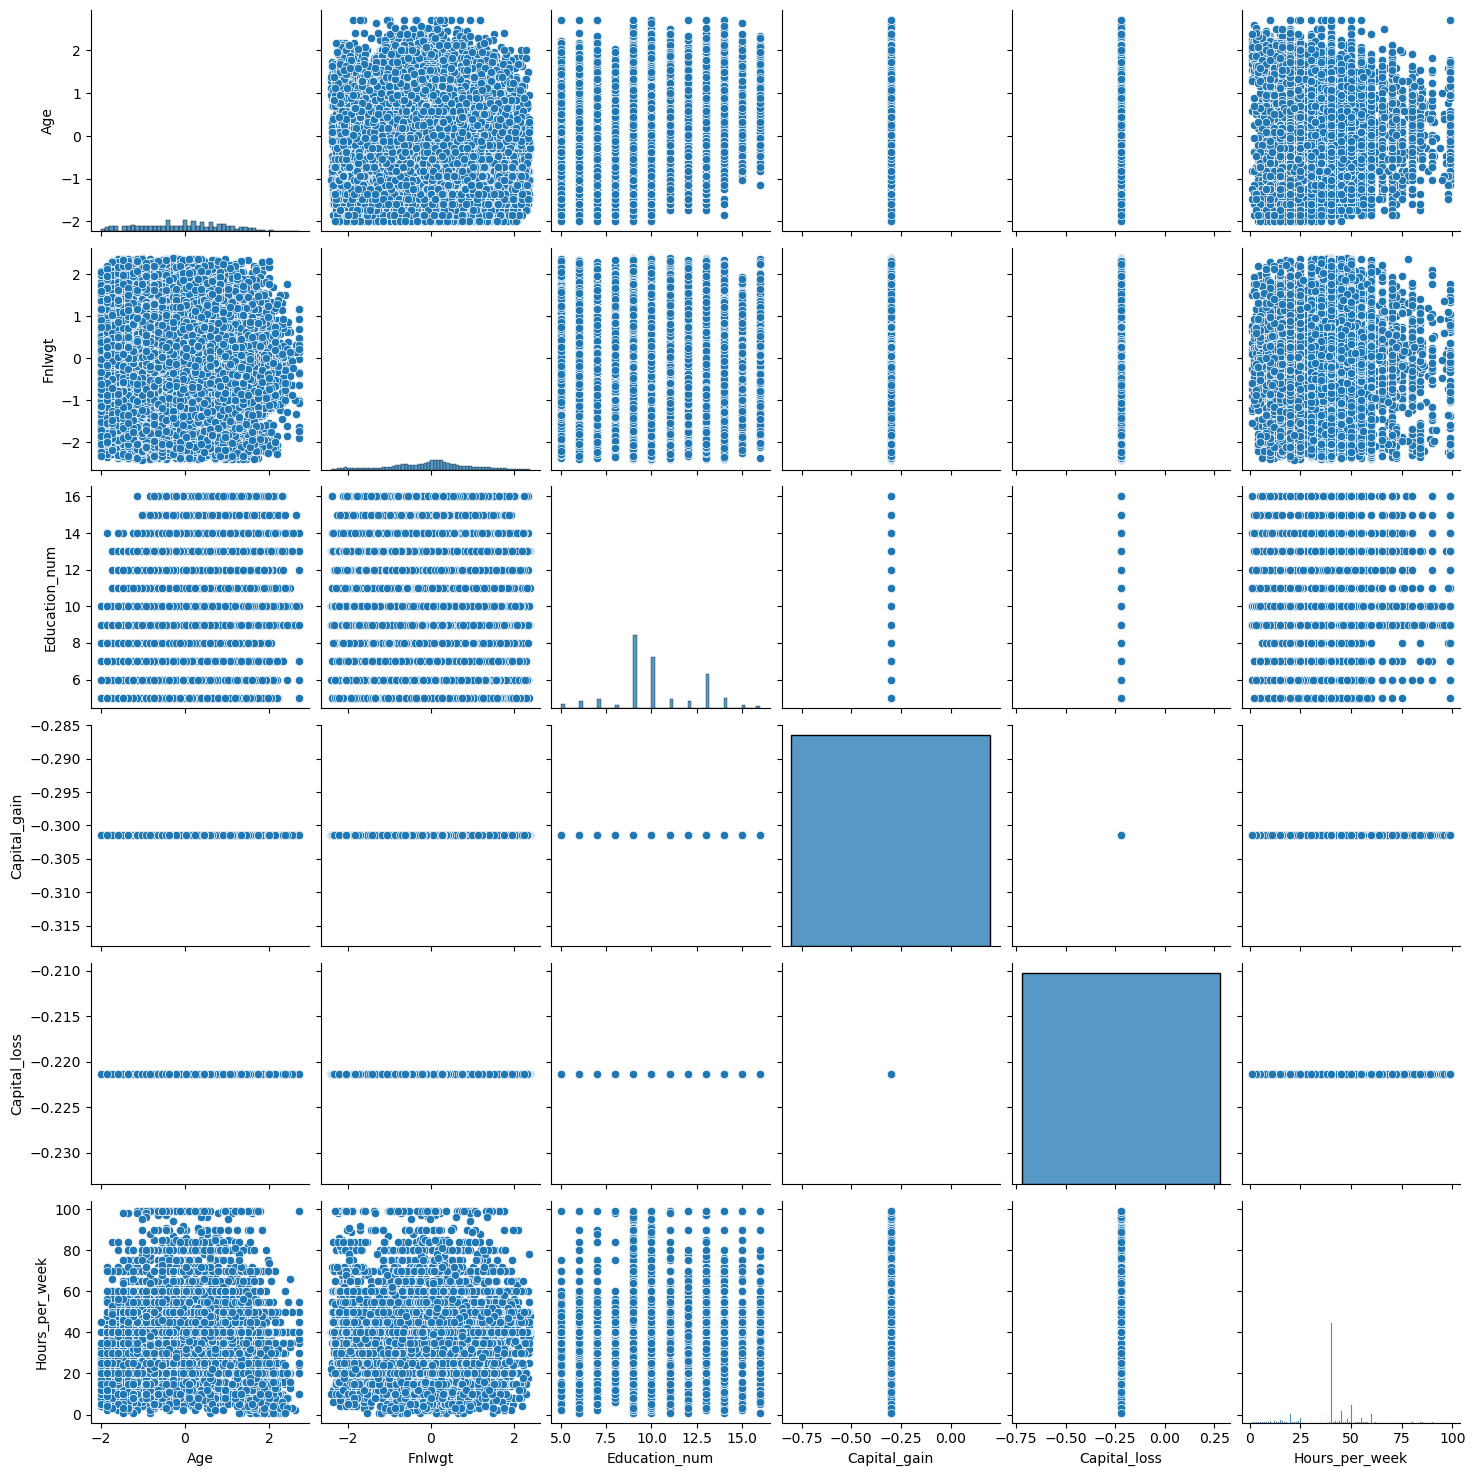

In [1138]:
sns.pairplot(df)

# Observations-

1. Capital_gain & Education_num has positive correlationshipn with each other.
2. Education_num & hours_per_week has positive correlationship with each other.
3. Capital_gain & Age has positive correlationship with each other.
4. Capital_gain & Hours_per_week has positive correlationship with each other.
5. Age & Fnlwgt has negetive correlationship with each other.

# Encoding of object data using label encoder-

In [1139]:
#Applying label encoder on the columns having category only 2

In [1140]:
from sklearn.preprocessing import LabelEncoder

In [1141]:
x= LabelEncoder()

In [1142]:
df1=x.fit_transform(df['Sex'])
pd.Series(df1)

0        1
1        1
2        1
3        0
4        0
        ..
26897    1
26898    0
26899    1
26900    0
26901    1
Length: 26902, dtype: int32

In [1143]:
df2=x.fit_transform(df['Income'])
pd.Series(df2)

0        0
1        0
2        0
3        0
4        0
        ..
26897    0
26898    0
26899    1
26900    0
26901    0
Length: 26902, dtype: int32

In [1144]:
df['Sex']=df1

In [1145]:
df['Income']=df2

In [1146]:
#Applying binary encoder on the columns having many categories-

In [1147]:
df[object].nunique()

Workclass          9
Education         12
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    41
Income             2
dtype: int64

In [1148]:
from category_encoders import BinaryEncoder

In [1149]:
be=BinaryEncoder()

In [1150]:
df[['Workclass_0','Workclass_1','Workclass_2','Workclass_3']]=be.fit_transform(df['Workclass'])

In [1151]:
df[['Education_0','Education_1','Education_2','Education_3']]=be.fit_transform(df['Education'])

In [1152]:
df[['Marital_status_0','Marital_status_1','Marital_status_2']]=be.fit_transform(df['Marital_status'])

In [1153]:
df[['Occupation_0','Occupation_1','Occupation_2','Occupation_3']]=be.fit_transform(df['Occupation'])

In [1154]:
df[['Relationship_0','Relationship_1','Relationship_2']]=be.fit_transform(df['Relationship'])

In [1155]:
df[['Race_0','Race_1','Race_2']]=be.fit_transform(df['Race'])

In [1156]:
df[['Native_country_0','Native_country_1','Native_country_2','Native_country_3','Native_country_4','Native_country_5']]=be.fit_transform(df['Native_country'])

Now we have encoded the columns having object data with many categories now we will drop the these existing columns which we have encoded.

In [1157]:
df=df.drop(columns=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Native_country'],axis=1)
df

Age    Fnlwgt  Education_num  Sex  Capital_gain  Capital_loss  \
0      0.891733 -1.089960             13    1     -0.301491     -0.221299   
1      0.102259  0.398771              9    1     -0.301491     -0.221299   
2      1.064242  0.562562              7    1     -0.301491     -0.221299   
3     -0.732199  1.340353             13    0     -0.301491     -0.221299   
4      0.027550  0.957178             14    0     -0.301491     -0.221299   
...         ...       ...            ...  ...           ...           ...   
32554 -1.358807  1.144012             10    1     -0.301491     -0.221299   
32555 -0.828514  0.746761             12    0     -0.301491     -0.221299   
32556  0.246949 -0.193274              9    1     -0.301491     -0.221299   
32557  1.334550 -0.219732              9    0     -0.301491     -0.221299   
32558 -1.358807  0.271699              9    1     -0.301491     -0.221299   

       Hours_per_week  Income  Workclass_0  Workclass_1  ...  Relationship_2  \
0                  13       0            0            0  ...               1   
1                  40       0            0            0  ...               0   
2                  40       0            0            0  ...               1   
3                  40       0            0            0  ...               1   
4                  40       0            0            0  ...               1   
...               ...     ...          ...          ...  ...             ...   
32554              40       0            0            0  ...               0   
32555              38       0            0            0  ...               1   
32556              40       1            0            0  ...               1   
32557              40       0            0            0  ...               1   
32558              20       0            0            0  ...               0   

       Race_0  Race_1  Race_2  Native_country_0  Native_country_1  \
0           0       0       1                 0                 0   
1           0       0       1                 0                 0   
2           0       1       0                 0                 0   
3           0       1       0                 0                 0   
4           0       0       1                 0                 0   
...       ...     ...     ...               ...               ...   
32554       0       0       1                 0                 0   
32555       0       0       1                 0                 0   
32556       0       0       1                 0                 0   
32557       0       0       1                 0                 0   
32558       0       0       1                 0                 0   

       Native_country_2  Native_country_3  Native_country_4  Native_country_5  
0                     0                 0                 0                 1  
1                     0                 0                 0                 1  
2                     0                 0                 0                 1  
3                     0                 0                 1                 0  
4                     0                 0                 0                 1  
...                 ...               ...               ...               ...  
32554                 0                 0                 0                 1  
32555                 0                 0                 0                 1  
32556                 0                 0                 0                 1  
32557                 0                 0                 0                 1  
32558                 0                 0                 0                 1  

[26902 rows x 35 columns]

In [1158]:
df.dtypes

Age                 float64
Fnlwgt              float64
Education_num         int64
Sex                   int32
Capital_gain        float64
Capital_loss        float64
Hours_per_week        int64
Income                int32
Workclass_0           int64
Workclass_1           int64
Workclass_2           int64
Workclass_3           int64
Education_0           int64
Education_1           int64
Education_2           int64
Education_3           int64
Marital_status_0      int64
Marital_status_1      int64
Marital_status_2      int64
Occupation_0          int64
Occupation_1          int64
Occupation_2          int64
Occupation_3          int64
Relationship_0        int64
Relationship_1        int64
Relationship_2        int64
Race_0                int64
Race_1                int64
Race_2                int64
Native_country_0      int64
Native_country_1      int64
Native_country_2      int64
Native_country_3      int64
Native_country_4      int64
Native_country_5      int64
dtype: object

Now we can see that all the object data has been encoded now.

# Checking data statistics again after encoding of data-

In [1037]:
df.describe()

Age        Fnlwgt  Education_num           Sex  Capital_gain  \
count  26902.000000  26902.000000   26902.000000  26902.000000  2.690200e+04   
mean      -0.072988     -0.030647      10.208051      0.651773 -3.014911e-01   
std        0.996224      0.955251       2.184005      0.476417  1.553786e-13   
min       -1.997312     -2.407158       5.000000      0.000000 -3.014911e-01   
25%       -0.828514     -0.619487       9.000000      0.000000 -3.014911e-01   
50%       -0.048838      0.043769      10.000000      1.000000 -3.014911e-01   
75%        0.710430      0.553369      12.000000      1.000000 -3.014911e-01   
max        2.712274      2.374789      16.000000      1.000000 -3.014911e-01   

       Capital_loss  Hours_per_week        Income   Workclass_0   Workclass_1  \
count  2.690200e+04    26902.000000  26902.000000  26902.000000  26902.000000   
mean  -2.212988e-01       40.056353      0.196305      0.000632      0.179912   
std    1.305924e-13       12.280183      0.397209      0.025131      0.384122   
min   -2.212988e-01        1.000000      0.000000      0.000000      0.000000   
25%   -2.212988e-01       40.000000      0.000000      0.000000      0.000000   
50%   -2.212988e-01       40.000000      0.000000      0.000000      0.000000   
75%   -2.212988e-01       45.000000      0.000000      0.000000      0.000000   
max   -2.212988e-01       99.000000      1.000000      1.000000      1.000000   

       ...  Relationship_2        Race_0        Race_1        Race_2  \
count  ...    26902.000000  26902.000000  26902.000000  26902.000000   
mean   ...        0.533120      0.017396      0.130808      0.893242   
std    ...        0.498911      0.130746      0.337197      0.308811   
min    ...        0.000000      0.000000      0.000000      0.000000   
25%    ...        0.000000      0.000000      0.000000      1.000000   
50%    ...        1.000000      0.000000      0.000000      1.000000   
75%    ...        1.000000      0.000000      0.000000      1.000000   
max    ...        1.000000      1.000000      1.000000      1.000000   

       Native_country_0  Native_country_1  Native_country_2  Native_country_3  \
count      26902.000000      26902.000000      26902.000000      26902.000000   
mean           0.008364          0.020407          0.043119          0.050368   
std            0.091072          0.141392          0.203130          0.218707   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       Native_country_4  Native_country_5  
count      26902.000000      26902.000000  
mean           0.034198          0.952680  
std            0.181741          0.212326  
min            0.000000          0.000000  
25%            0.000000          1.000000  
50%            0.000000          1.000000  
75%            0.000000          1.000000  
max            1.000000          1.000000  

[8 rows x 35 columns]

# Observations-

1. The count of all the values are same which means there are no null values present in the dataset.
2. Now mean & median in all continous data columns are almost equal so there is less skewness in the data now.
3. The gap bw 75% & max. value is almost very close not so far which means there are no outliers present now in the continous data columns.

# Correlation matrix-

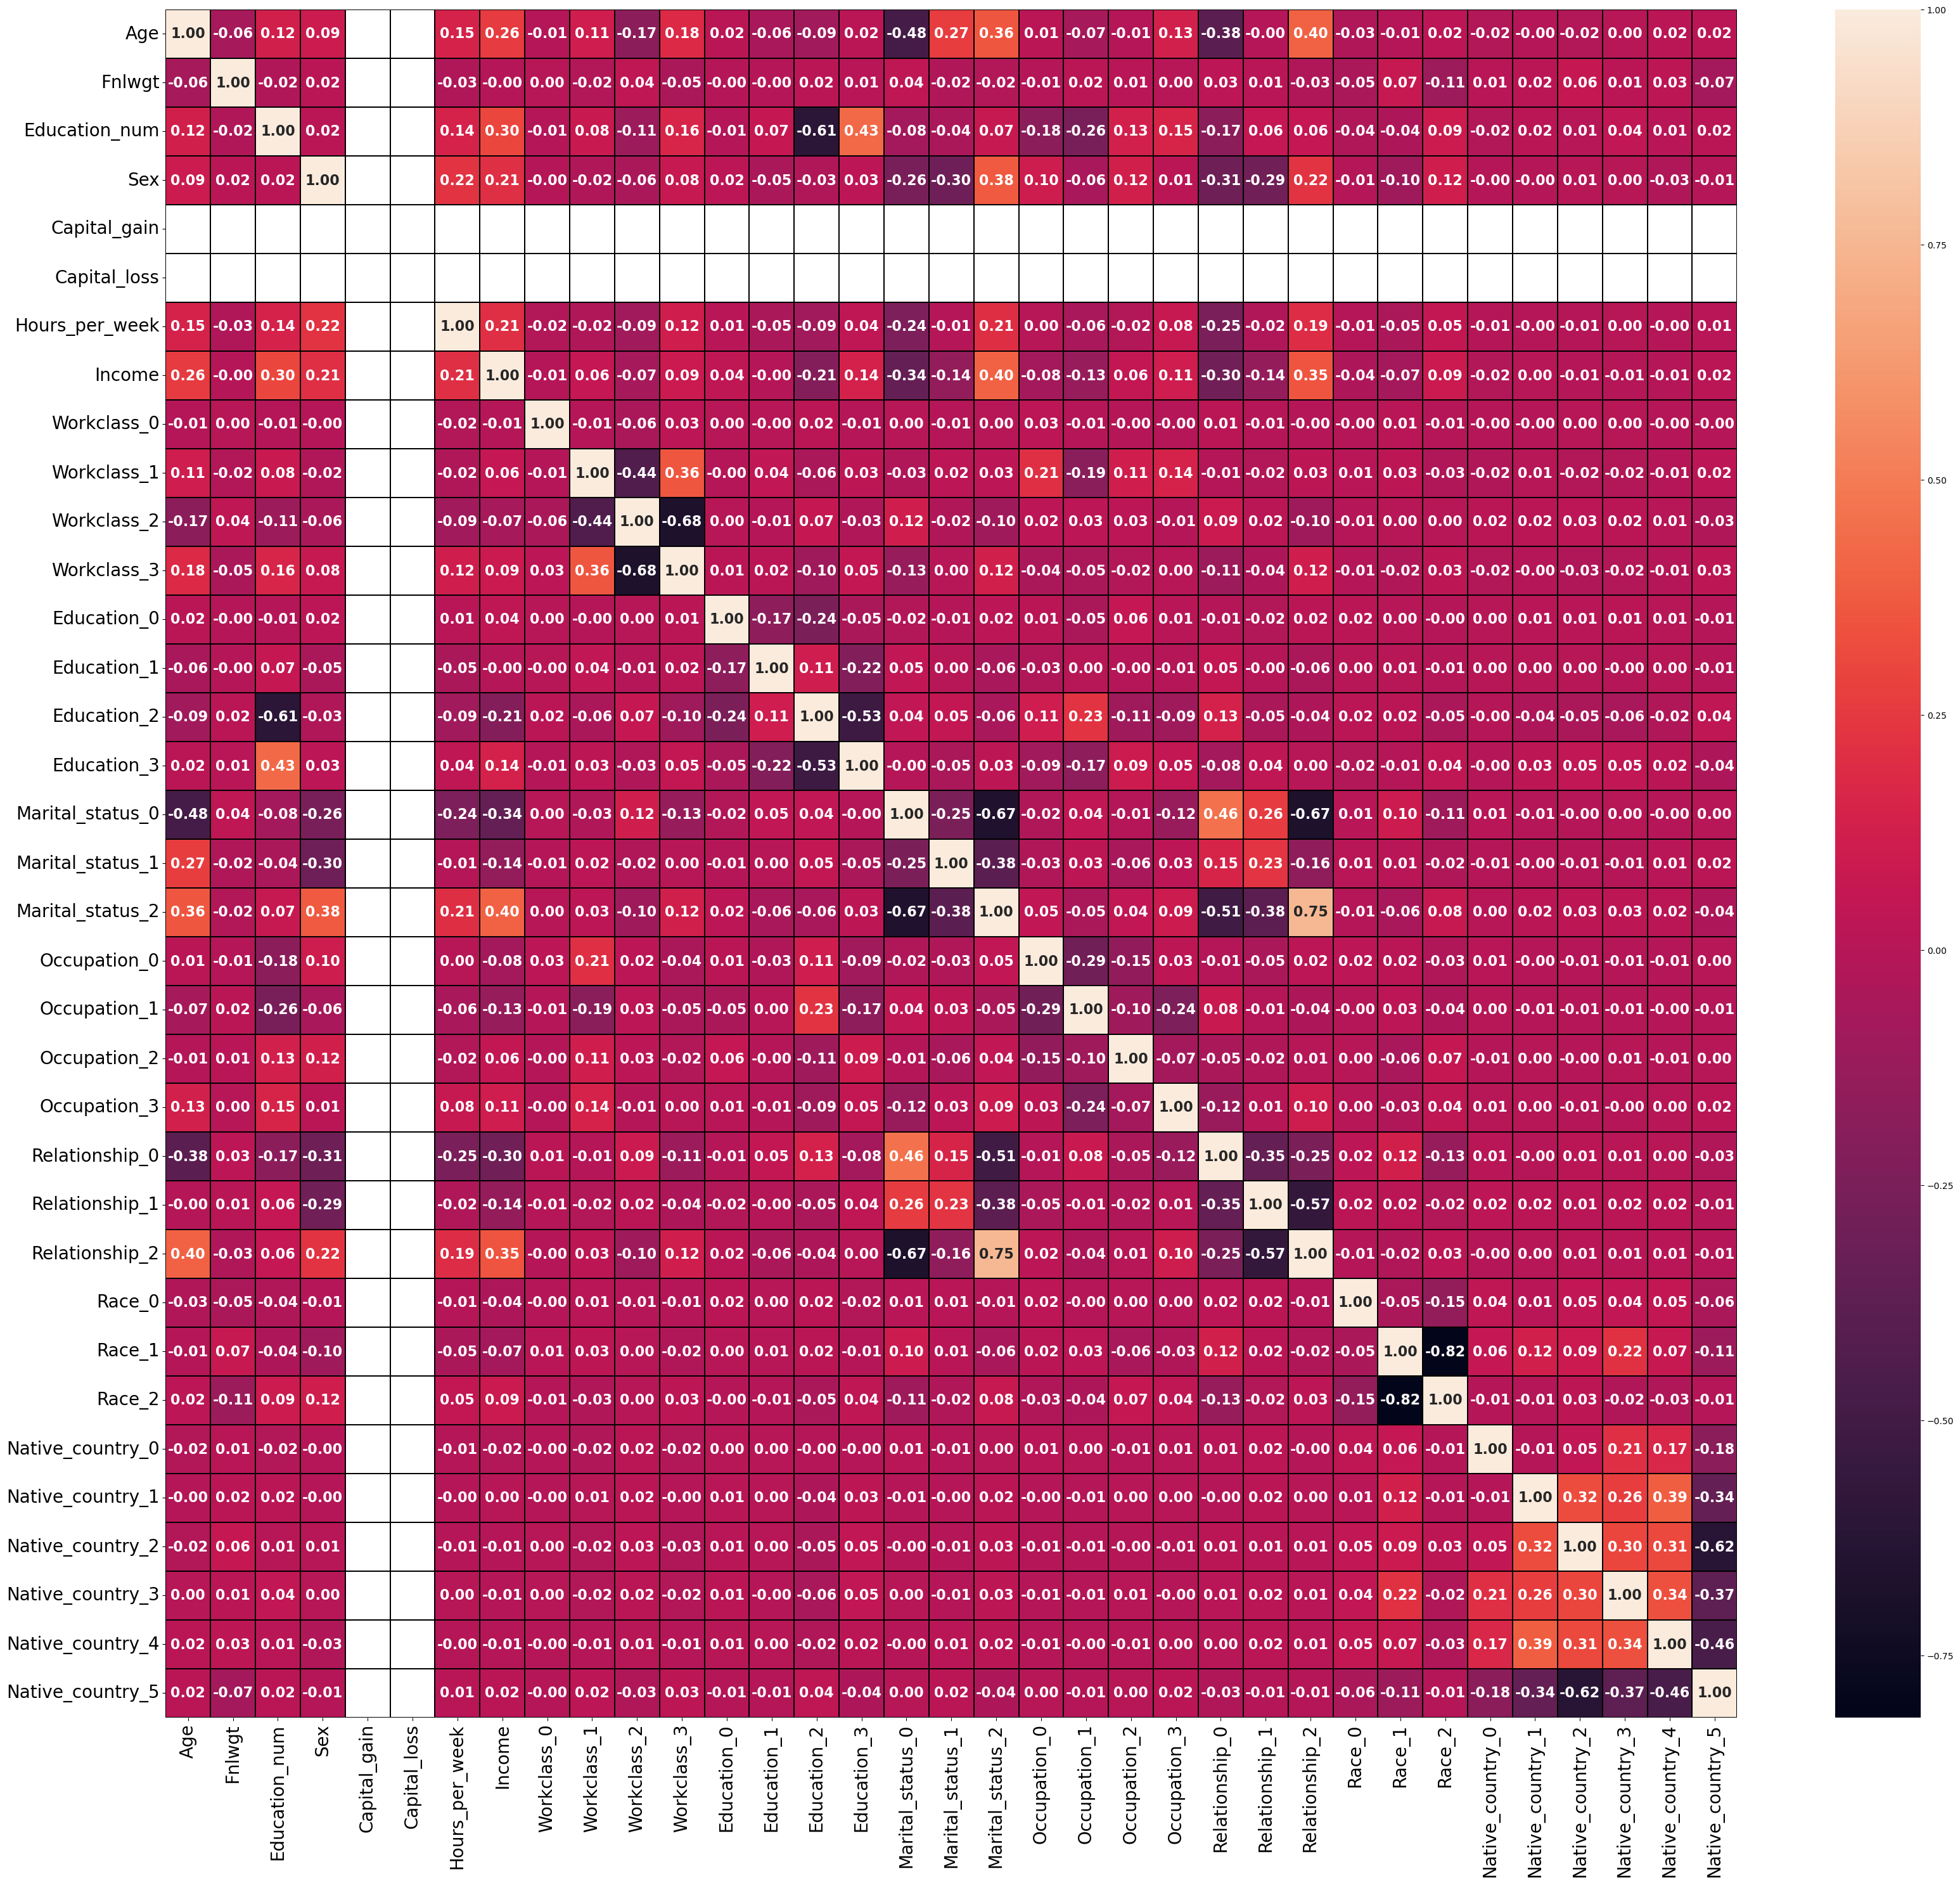

In [1038]:
plt.figure(figsize=(40,35))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show() 

# Observations-

1. There is 48% negetive correlationship bw age & marital_status_0.
2. There is 40% positive correlationship bw age & relationship_2.
3. There is 61% negetive correlationship bw Education_num & Education_2.
4. There is 38% positive correlationshipThere is 61% negetive correlationship bw Education_num & Education_2. .
5. There is 62% negetive correlationship bw Native_country_5 & Native_country_2.
6. There is 46% negetive correlationship bw Native_country_5 & Native_country_4.
7. There is 75% positive correlationshipThere bw relationship_2 & Marital_status_2.
8. There is 67% negetive correlationship bw relationship_2 & Marital_status_0.
9. There is 82% negetive correlation bw race-2 & race-1.

# Correlation bw features & label-

In [1039]:
df.corr()['Income'].sort_values()

Marital_status_0   -0.343630
Relationship_0     -0.295319
Education_2        -0.207883
Marital_status_1   -0.142849
Relationship_1     -0.140457
Occupation_1       -0.132870
Occupation_0       -0.076464
Race_1             -0.071550
Workclass_2        -0.067788
Race_0             -0.037128
Native_country_0   -0.020726
Workclass_0        -0.012428
Native_country_3   -0.008127
Native_country_4   -0.008033
Native_country_2   -0.007240
Education_1        -0.004280
Fnlwgt             -0.002197
Native_country_1    0.003461
Native_country_5    0.016263
Education_0         0.038279
Occupation_2        0.056125
Workclass_1         0.060150
Workclass_3         0.090392
Race_2              0.091155
Occupation_3        0.108147
Education_3         0.140303
Sex                 0.205864
Hours_per_week      0.208245
Age                 0.255437
Education_num       0.300224
Relationship_2      0.351263
Marital_status_2    0.400366
Income              1.000000
Capital_gain             NaN
Capital_loss  

# Graphical Representation of correlationship between features & target variable-

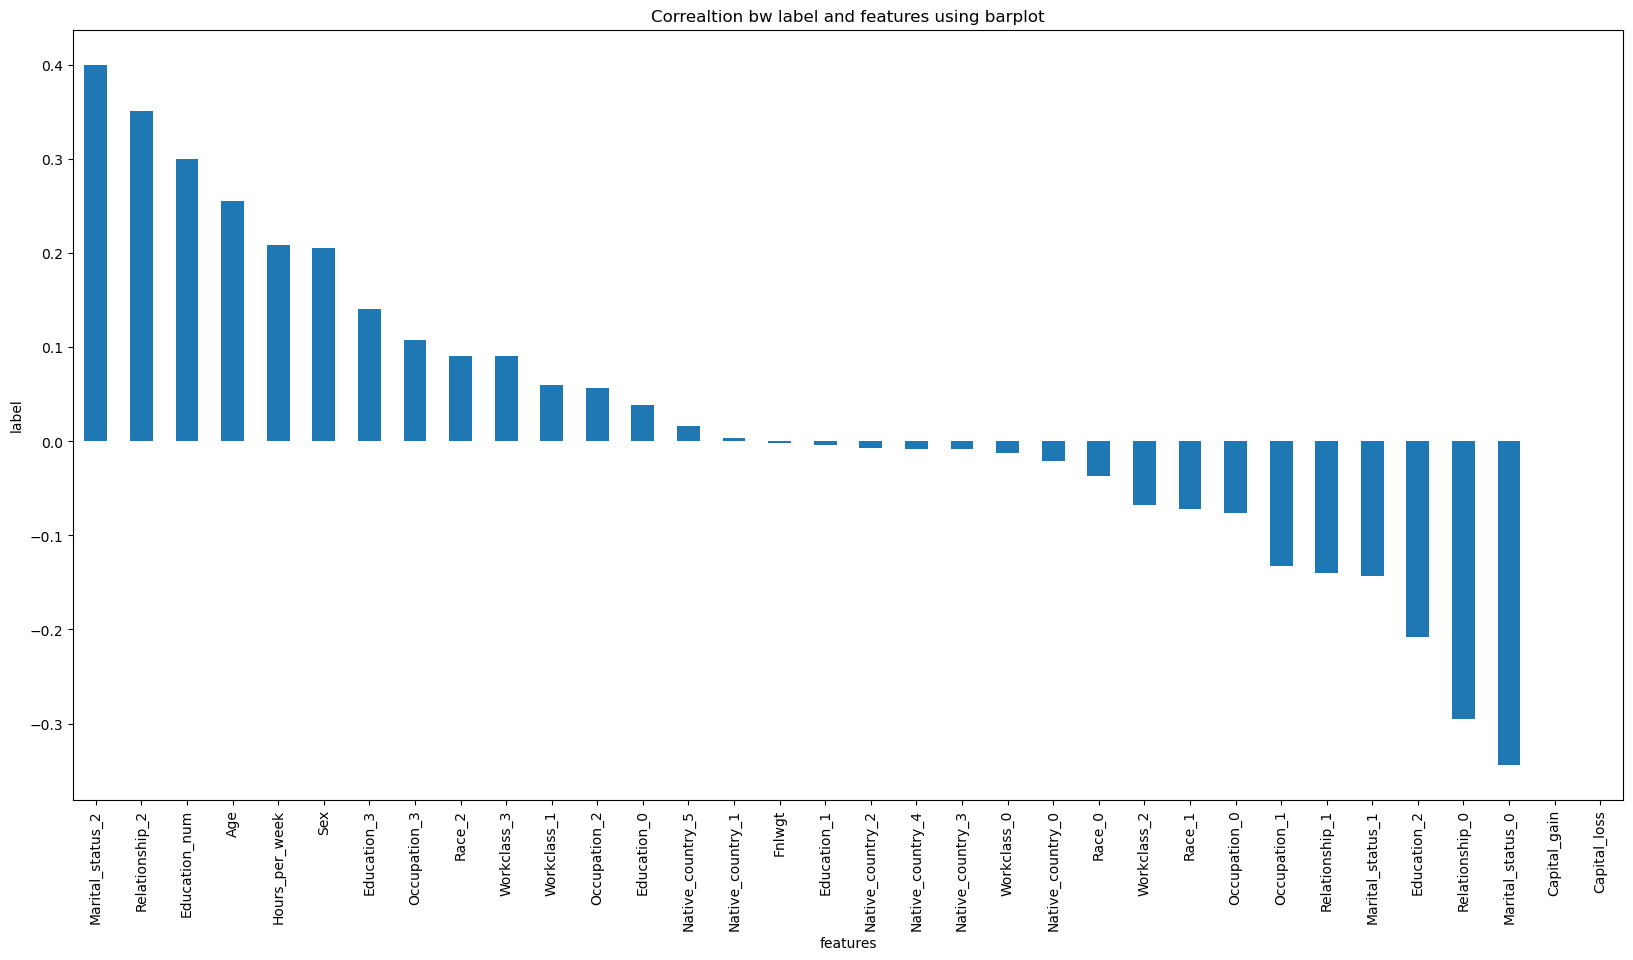

In [1040]:
plt.figure(figsize=(20,10))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-

1. Marital_status_2,Relationship_2 column has the highest positive correlationship with target variable.
2. Marital_status_0,Relationship_0 column has the highest negetive correlationship with target variable.
3. Native_country_5,Native_country_1,Fnlwgt,Education_1,Native_country_2,Native_country_4,Native_country_3,Workclass_0,Native_country_0 has the least correlationship with target variable.

# Separating features and label-

In [1041]:
x=df.drop('Income',axis=1)  
y=df['Income']

# Feature Scaling-

In [1042]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Age    Fnlwgt  Education_num       Sex  Capital_gain  \
0      0.968395 -1.108958       1.278385  0.730942  5.551115e-17   
1      0.175915  0.449542      -0.553146  0.730942  5.551115e-17   
2      1.141562  0.621010      -1.468912  0.730942  5.551115e-17   
3     -0.661721  1.435253       1.278385 -1.368098  5.551115e-17   
4      0.100921  1.034119       1.736268 -1.368098  5.551115e-17   
...         ...       ...            ...       ...           ...   
26897 -1.290716  1.229710      -0.095263  0.730942  5.551115e-17   
26898 -0.758404  0.813841       0.820502 -1.368098  5.551115e-17   
26899  0.321155 -0.170248      -0.553146  0.730942  5.551115e-17   
26900  1.412899 -0.197947      -0.553146 -1.368098  5.551115e-17   
26901 -1.290716  0.316515      -0.553146  0.730942  5.551115e-17   

       Capital_loss  Hours_per_week  Workclass_0  Workclass_1  Workclass_2  \
0               0.0       -2.203294    -0.025146    -0.468382    -2.224075   
1               0.0       -0.004589    -0.025146    -0.468382     0.449625   
2               0.0       -0.004589    -0.025146    -0.468382     0.449625   
3               0.0       -0.004589    -0.025146    -0.468382     0.449625   
4               0.0       -0.004589    -0.025146    -0.468382     0.449625   
...             ...             ...          ...          ...          ...   
26897           0.0       -0.004589    -0.025146    -0.468382     0.449625   
26898           0.0       -0.167456    -0.025146    -0.468382     0.449625   
26899           0.0       -0.004589    -0.025146    -0.468382     0.449625   
26900           0.0       -0.004589    -0.025146    -0.468382     0.449625   
26901           0.0       -1.633260    -0.025146    -0.468382     0.449625   

       ...  Relationship_2    Race_0    Race_1    Race_2  Native_country_0  \
0      ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
1      ...       -1.068587 -0.133058 -0.387935  0.345713         -0.091838   
2      ...        0.935815 -0.133058  2.577748 -2.892575         -0.091838   
3      ...        0.935815 -0.133058  2.577748 -2.892575         -0.091838   
4      ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
...    ...             ...       ...       ...       ...               ...   
26897  ...       -1.068587 -0.133058 -0.387935  0.345713         -0.091838   
26898  ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
26899  ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
26900  ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
26901  ...       -1.068587 -0.133058 -0.387935  0.345713         -0.091838   

       Native_country_1  Native_country_2  Native_country_3  Native_country_4  \
0             -0.144335         -0.212279         -0.230303         -0.188173   
1             -0.144335         -0.212279         -0.230303         -0.188173   
2             -0.144335         -0.212279         -0.230303         -0.188173   
3             -0.144335         -0.212279         -0.230303          5.314255   
4             -0.144335         -0.212279         -0.230303         -0.188173   
...                 ...               ...               ...               ...   
26897         -0.144335         -0.212279         -0.230303         -0.188173   
26898         -0.144335         -0.212279         -0.230303         -0.188173   
26899         -0.144335         -0.212279         -0.230303         -0.188173   
26900         -0.144335         -0.212279         -0.230303         -0.188173   
26901         -0.144335         -0.212279         -0.230303         -0.188173   

       Native_country_5  
0              0.222868  
1              0.222868  
2              0.222868  
3             -4.486954  
4              0.222868  
...                 ...  
26897          0.222868  
26898          0.222868  
26899          0.222868  
26900          0.222868  
26901          0.222868  

[26902 rows x 34 columns]

Now the data has been scaled.

# Checking Multicollinearity among features-

In [1043]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.748793               Age
1     1.037726            Fnlwgt
2     1.942615     Education_num
3     1.629095               Sex
4     1.000000      Capital_gain
5          NaN      Capital_loss
6     1.153439    Hours_per_week
7     1.008629       Workclass_0
8     1.471177       Workclass_1
9     2.060872       Workclass_2
10    1.936919       Workclass_3
11    1.193741       Education_0
12    1.148004       Education_1
13    2.125948       Education_2
14    1.589099       Education_3
15    5.257185  Marital_status_0
16    3.544114  Marital_status_1
17    5.443216  Marital_status_2
18    1.323281      Occupation_0
19    1.321589      Occupation_1
20    1.147643      Occupation_2
21    1.137194      Occupation_3
22    3.680500    Relationship_0
23    3.570983    Relationship_1
24    4.019588    Relationship_2
25    1.182352            Race_0
26    4.021522            Race_1
27    3.963863            Race_2
28    1.099021  Native_country_0
29    1.304257  Native_country_1
30    1.709569  Native_country_2
31    1.389787  Native_country_3
32    1.458418  Native_country_4
33    2.006041  Native_country_5

we can see that multicollinearity under acceptable range i.e <10 so we can move forward for model building.

# Treating Class imbalance with Oversampling method-

In [1044]:
y.value_counts()

0    21621
1     5281
Name: Income, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method-

In [1045]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [1046]:
y.value_counts()

0    21621
1    21621
Name: Income, dtype: int64

Now the data is balanced.now we can build machine learning classification models further-

# Model-I (With all features without feature engineering)

In [1047]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)  

Best accuracy is 0.8997147922608495 at random state 90


Here we can see that at random state 50 our model performing best and giving highest accuracy of almost 90% so we will use this random state for splitting of the data.

In [1048]:
# Splitting of data on the same random state-

In [1049]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [1050]:
#Importing library-

In [1051]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [1052]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

# Random forest-

In [1053]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [1054]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:89.89%


 Confusion matrix
 [[5668  788]
 [ 524 5993]]


 Test classification report
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      6456
           1       0.88      0.92      0.90      6517

    accuracy                           0.90     12973
   macro avg       0.90      0.90      0.90     12973
weighted avg       0.90      0.90      0.90     12973



for Random forest classifier we got train accuracy-100% & test accuracy-90% and F1 Score-90% which seems like an overfitted model as training accuracy reaching 100%.

In [1055]:
#Cross validation score-

In [1056]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.82391028 0.89871661 0.9196346  0.92425994 0.91975023]
0.8972543333280925


The cross validation score for random forest model is 90%.

# Logistic regression-

In [1057]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [1058]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 80.84%
=====================Test Result=====================
accuracy_score:81.68%


 Confusion matrix
 [[4952 1504]
 [ 873 5644]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      6456
           1       0.79      0.87      0.83      6517

    accuracy                           0.82     12973
   macro avg       0.82      0.82      0.82     12973
weighted avg       0.82      0.82      0.82     12973



from Logistic Regression we are getting training accuracy-81% & test accuracy-82% with F1 Score-82% 

In [1059]:
#Cross validation score-

In [1060]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.80460169 0.80772344 0.8080481  0.81544866 0.81614246]
0.8103928694467092


The cross validation score for Logistic regression is 81%

# SupportVectorClassifier-

In [1061]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [1062]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 85.76%
=====================Test Result=====================
accuracy_score:85.16%


 Confusion matrix
 [[5109 1347]
 [ 578 5939]]


 Test classification report
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      6456
           1       0.82      0.91      0.86      6517

    accuracy                           0.85     12973
   macro avg       0.86      0.85      0.85     12973
weighted avg       0.86      0.85      0.85     12973



for Support vector classifier we got train accuracy-86% & test accuracy-85% and F1 Score-85% 

In [1063]:
#Cross validation score-

In [1064]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.82714765 0.84657186 0.84886679 0.85464847 0.85534228]
0.8465154088921103


The cross validation score for support vector classifier is 85%.

# GradientBoostingClassifier-

In [1065]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [1066]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 86.19%
=====================Test Result=====================
accuracy_score:86.52%


 Confusion matrix
 [[5310 1146]
 [ 603 5914]]


 Test classification report
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      6456
           1       0.84      0.91      0.87      6517

    accuracy                           0.87     12973
   macro avg       0.87      0.86      0.86     12973
weighted avg       0.87      0.87      0.86     12973



for Gradient boosting classifier we got train accuracy-86% & test accuracy-87% and F1 Score-87% which seems like an generalised model.

In [1067]:
#Cross validation score-

In [1068]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())

[0.78691178 0.86090878 0.8756938  0.87650324 0.87257169]
0.8545178579889618


The cross validation score for Gradient boosting classifier is 86%.

# AdaBoostClassifier-

In [1069]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [1070]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 83.36%
=====================Test Result=====================
accuracy_score:83.86%


 Confusion matrix
 [[5179 1277]
 [ 817 5700]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      6456
           1       0.82      0.87      0.84      6517

    accuracy                           0.84     12973
   macro avg       0.84      0.84      0.84     12973
weighted avg       0.84      0.84      0.84     12973



for Ada boost classifier we got train accuracy-84% & test accuracy-85% and F1 Score-85%.

In [1071]:
#Cross validation score-

In [1072]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.78714302 0.83697537 0.84458834 0.85141073 0.84759482]
0.8335424579464572


The cross validation score for Adaboost claasifier is 83%.

# BaggingClassifier-

In [1073]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [1074]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 99.41%
=====================Test Result=====================
accuracy_score:88.05%


 Confusion matrix
 [[5701  755]
 [ 795 5722]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6456
           1       0.88      0.88      0.88      6517

    accuracy                           0.88     12973
   macro avg       0.88      0.88      0.88     12973
weighted avg       0.88      0.88      0.88     12973



For Bagging classifier we got train accuracy-99% & test accuracy-88% and F1 Score-88% which looks like overfitted model as train accuracy is reaching about 100% and there is a big differnce bw train & test accuracy.

In [1075]:
#Cross validation score-

In [1076]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.74621344 0.88542028 0.90818686 0.91570305 0.91362165]
0.8738290556495171


The cross validation score for bagging classifier is 87%

# ExtraTreeClassifier-

In [1077]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [1078]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:90.20%


 Confusion matrix
 [[5660  796]
 [ 476 6041]]


 Test classification report
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      6456
           1       0.88      0.93      0.90      6517

    accuracy                           0.90     12973
   macro avg       0.90      0.90      0.90     12973
weighted avg       0.90      0.90      0.90     12973



for Extra tree classifier we got train accuracy-100% & test accuracy-90% and F1 Score-90% which looks like overfitted model as train accuracy is reaching about 100%.

In [1079]:
#Cross validation score-

In [1080]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.86079316 0.90438201 0.91975023 0.92657262 0.92090657]
0.9064809163930445


The cross validation score for Extra tree classifier is 90%.

# DecisionTreeclassifier-

In [1081]:
from sklearn.tree import DecisionTreeClassifier

In [1082]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [1083]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 100.00%
=====================Test Result=====================
accuracy_score:84.14%


 Confusion matrix
 [[5429 1027]
 [1031 5486]]


 Test classification report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      6456
           1       0.84      0.84      0.84      6517

    accuracy                           0.84     12973
   macro avg       0.84      0.84      0.84     12973
weighted avg       0.84      0.84      0.84     12973



for Decision Tree classifier we got train accuracy-100% & test accuracy-84% and F1 Score-84% which seems like an overfitted model as train accuracy is 100%.

In [1084]:
#Cross validation score-

In [1085]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[0.7163834  0.84946237 0.88286309 0.87904718 0.86459297]
0.8384698000517457


The cross validation score for Decision tree classifier is 84%.

# Selection of best model-

Here we will select Gradient boosting classifier model as our best model as it is giving train accuracy-86% test accuracy-87% F1 score-87% and cross validation score of 86%.this is class imbalance classification problem where the difference bw test accuracy & F1 score must be least as possible. so whichever model giving the least score is our best performing model. Gradient boosting classifier model is giving least difference bw test accuracy & f1 score so looks generalised model.

# Hyper parameter tunning-

In [1086]:
from sklearn.model_selection import RandomizedSearchCV

Here we have tried with grid search cv before where it was taking more than 24 hrs to fetch best parameters so we have tried randomizied search cv method.

In [1087]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40,50,500,100,200,300],'max_depth':[3,5,7,9,11,13],
            'n_estimators':[200,300,400],'min_samples_leaf':[2,3]}

In [1088]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1089]:
gs=RandomizedSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [1090]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13],
                                        'min_samples_leaf': [2, 3],
                                        'n_estimators': [200, 300, 400],
                                        'random_state': [10, 20, 40, 50, 500,
                                                         100, 200, 300]})

In [1091]:
gs.best_params_

{'random_state': 20,
 'n_estimators': 400,
 'min_samples_leaf': 3,
 'max_depth': 9,
 'loss': 'exponential',
 'criterion': 'friedman_mse'}

In [1092]:
final_model=GradientBoostingClassifier(criterion='friedman_mse',max_depth=9,loss='exponential',n_estimators=400,min_samples_leaf=3,random_state=20)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [1093]:
accuracy_score(y_test,pred)

0.9069606104987281

Here we can see that the accuracy of the Support vector classifier model has been increased to almost 91% with the help of grid search CV,where as it was just 87% earlier.

In [1094]:
from sklearn.metrics import plot_roc_curve

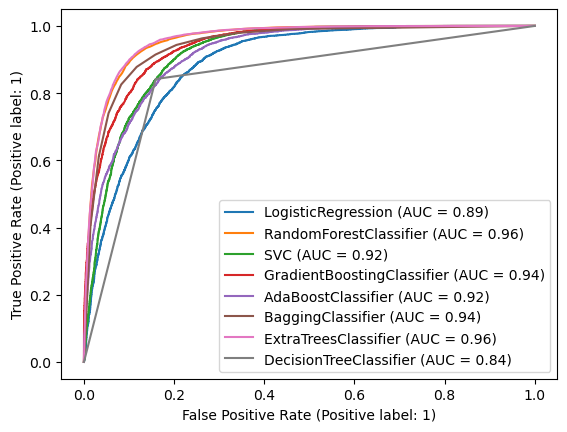

In [1095]:
d=plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(rf,x_test,y_test,ax=d.ax_)

plot_roc_curve(sv,x_test,y_test,ax=d.ax_)

plot_roc_curve(gb,x_test,y_test,ax=d.ax_)

plot_roc_curve(ab,x_test,y_test,ax=d.ax_)

plot_roc_curve(bc,x_test,y_test,ax=d.ax_)

plot_roc_curve(et,x_test,y_test,ax=d.ax_)

plot_roc_curve(dt,x_test,y_test,ax=d.ax_)


plt.legend(prop={'size':10}, loc='lower right')

plt.show()

Here we choose Gradient bossting as our best model with 94% area under the curve with being generalised model without any sort of overfitting. In the case of Random forest & extra tree classifier we can see these are overfitted models as they do have good difference bw train & test accuracy.

# Saving model-

In [1096]:
import joblib
joblib.dump(final_model,'Census income-1')

['Census income-1']

In [1097]:
model=joblib.load('Census income-1')

In [1098]:
#Lets predict with our model-

In [1099]:
prediction=model.predict(x_test)
prediction

array([1, 0, 1, ..., 1, 1, 0])

In [1100]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0              1         1
1              0         0
2              1         1
3              0         0
4              1         0
...          ...       ...
12968          1         1
12969          0         0
12970          1         1
12971          1         0
12972          0         0

[12973 rows x 2 columns]

# Plotting AUC & ROC curve-

In [1101]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

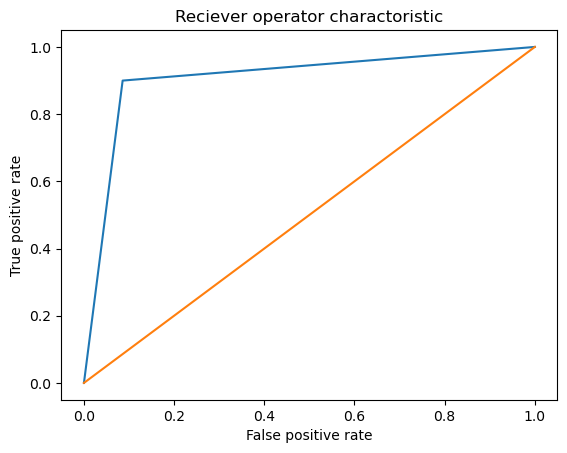

0.9069944368165691


In [1102]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

Here we can see that area under the curve is 91% for Support vector classifier model.

# Model-II(Feature engineering by select Kbest method-)

In [507]:
#Importing the data frame from aboove after the removal of nan values,skewness and outliers and encoding of object data-

In [894]:
df

Age    Fnlwgt  Education_num  Sex  Capital_gain  Capital_loss  \
0      0.891733 -1.089960             13    1     -0.301491     -0.221299   
1      0.102259  0.398771              9    1     -0.301491     -0.221299   
2      1.064242  0.562562              7    1     -0.301491     -0.221299   
3     -0.732199  1.340353             13    0     -0.301491     -0.221299   
4      0.027550  0.957178             14    0     -0.301491     -0.221299   
...         ...       ...            ...  ...           ...           ...   
32554 -1.358807  1.144012             10    1     -0.301491     -0.221299   
32555 -0.828514  0.746761             12    0     -0.301491     -0.221299   
32556  0.246949 -0.193274              9    1     -0.301491     -0.221299   
32557  1.334550 -0.219732              9    0     -0.301491     -0.221299   
32558 -1.358807  0.271699              9    1     -0.301491     -0.221299   

       Hours_per_week  Income  Workclass_0  Workclass_1  ...  Relationship_2  \
0                  13       0            0            0  ...               1   
1                  40       0            0            0  ...               0   
2                  40       0            0            0  ...               1   
3                  40       0            0            0  ...               1   
4                  40       0            0            0  ...               1   
...               ...     ...          ...          ...  ...             ...   
32554              40       0            0            0  ...               0   
32555              38       0            0            0  ...               1   
32556              40       1            0            0  ...               1   
32557              40       0            0            0  ...               1   
32558              20       0            0            0  ...               0   

       Race_0  Race_1  Race_2  Native_country_0  Native_country_1  \
0           0       0       1                 0                 0   
1           0       0       1                 0                 0   
2           0       1       0                 0                 0   
3           0       1       0                 0                 0   
4           0       0       1                 0                 0   
...       ...     ...     ...               ...               ...   
32554       0       0       1                 0                 0   
32555       0       0       1                 0                 0   
32556       0       0       1                 0                 0   
32557       0       0       1                 0                 0   
32558       0       0       1                 0                 0   

       Native_country_2  Native_country_3  Native_country_4  Native_country_5  
0                     0                 0                 0                 1  
1                     0                 0                 0                 1  
2                     0                 0                 0                 1  
3                     0                 0                 1                 0  
4                     0                 0                 0                 1  
...                 ...               ...               ...               ...  
32554                 0                 0                 0                 1  
32555                 0                 0                 0                 1  
32556                 0                 0                 0                 1  
32557                 0                 0                 0                 1  
32558                 0                 0                 0                 1  

[26902 rows x 35 columns]

# Correlationship bw features & label-

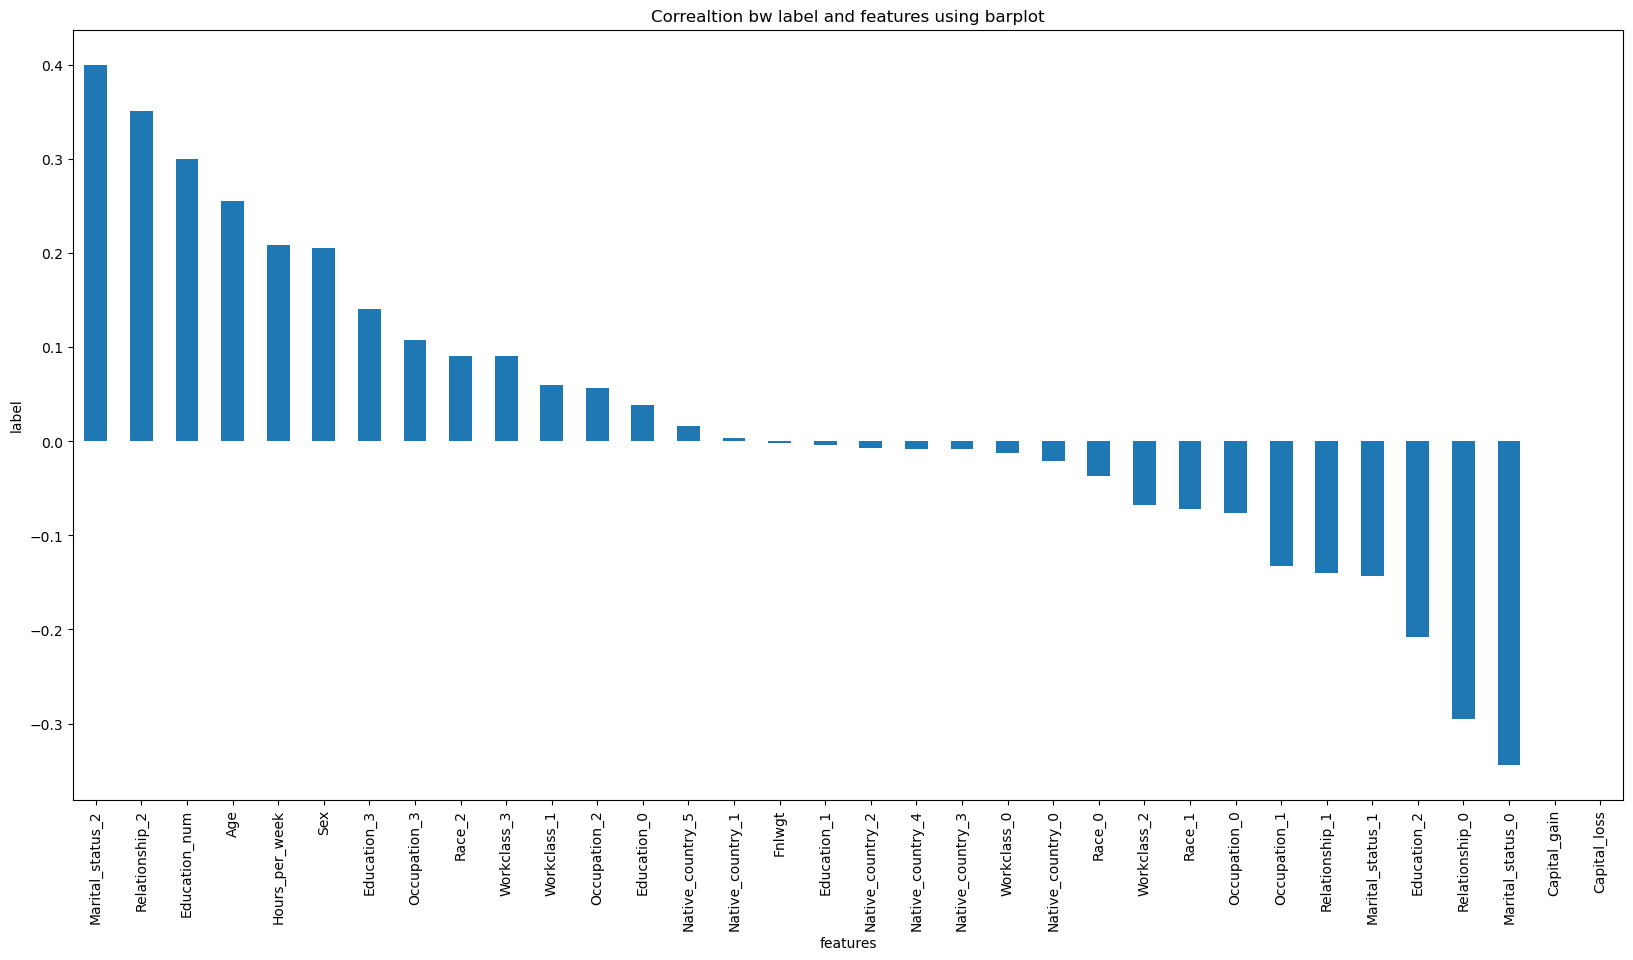

In [895]:
plt.figure(figsize=(20,10))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

# Observations-

1. Marital_status_2,Relationship_2 column has the highest positive correlationship with target variable.
2. Marital_status_0,Relationship_0 column has the highest negetive correlationship with target variable.
3. Native_country_5,Native_country_1,Fnlwgt,Education_1,Native_country_2,Native_country_4,Native_country_3,Workclass_0,Native_country_0 has the least correlationship with target variable.

# Feature selection through select k-best method-

In [896]:
x=df.drop(columns=['Income'],axis=1)
y=df.Income

In [897]:
from sklearn.feature_selection import SelectKBest,f_classif

In [898]:
best_features=SelectKBest(score_func=f_classif,k=30) 

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns) 



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(25,'score'))

          score      feature_name
17  5134.994480  Marital_status_2
24  3786.237708    Relationship_2
15  3601.682008  Marital_status_0
2   2664.814228     Education_num
22  2570.184311    Relationship_0
0   1877.685162               Age
6   1219.421995    Hours_per_week
13  1214.998567       Education_2
3   1190.472932               Sex
16   560.351484  Marital_status_1
23   541.369791    Relationship_1
14   540.159557       Education_3
19   483.437275      Occupation_1
21   318.338563      Occupation_3
27   225.391110            Race_2
10   221.601016       Workclass_3
18   158.203578      Occupation_0
26   138.419406            Race_1
9    124.180725       Workclass_2
8     97.677992       Workclass_1
20    85.002698      Occupation_2
11    39.474857       Education_0
25    37.133472            Race_0
28    11.559796  Native_country_0
33     7.116268  Native_country_5


In [899]:
#lets just saperate these 25 features in a new variable.

In [900]:
new_df=df[['Marital_status_2','Relationship_2','Marital_status_0','Education_num','Relationship_0','Age','Hours_per_week','Education_2','Sex','Marital_status_1','Relationship_1','Education_3','Occupation_1','Occupation_3','Race_2','Workclass_3','Occupation_0','Race_1','Workclass_2','Workclass_1','Occupation_2','Education_0','Race_0','Native_country_0','Income','Native_country_5']]
new_df

Marital_status_2  Relationship_2  Marital_status_0  Education_num  \
0                     1               1                 0             13   
1                     0               0                 0              9   
2                     1               1                 0              7   
3                     1               1                 0             13   
4                     1               1                 0             14   
...                 ...             ...               ...            ...   
32554                 0               0                 1             10   
32555                 1               1                 0             12   
32556                 1               1                 0              9   
32557                 0               1                 1              9   
32558                 0               0                 1              9   

       Relationship_0       Age  Hours_per_week  Education_2  Sex  \
0                   0  0.891733              13            0    1   
1                   0  0.102259              40            1    1   
2                   0  1.064242              40            1    1   
3                   0 -0.732199              40            0    0   
4                   0  0.027550              40            0    0   
...               ...       ...             ...          ...  ...   
32554               0 -1.358807              40            1    1   
32555               0 -0.828514              38            1    0   
32556               0  0.246949              40            1    1   
32557               1  1.334550              40            1    0   
32558               1 -1.358807              20            1    1   

       Marital_status_1  ...  Occupation_0  Race_1  Workclass_2  Workclass_1  \
0                     0  ...             0       0            0            0   
1                     1  ...             0       0            1            0   
2                     0  ...             0       1            1            0   
3                     0  ...             0       1            1            0   
4                     0  ...             0       0            1            0   
...                 ...  ...           ...     ...          ...          ...   
32554                 0  ...             1       0            1            0   
32555                 0  ...             1       0            1            0   
32556                 0  ...             1       0            1            0   
32557                 1  ...             0       0            1            0   
32558                 0  ...             0       0            1            0   

       Occupation_2  Education_0  Race_0  Native_country_0  Income  \
0                 0            0       0                 0       0   
1                 1            0       0                 0       0   
2                 1            0       0                 0       0   
3                 1            0       0                 0       0   
4                 0            0       0                 0       0   
...             ...          ...     ...               ...     ...   
32554             0            0       0                 0       0   
32555             1            0       0                 0       0   
32556             0            0       0                 0       1   
32557             0            0       0                 0       0   
32558             0            0       0                 0       0   

       Native_country_5  
0                     1  
1                     1  
2                     1  
3                     0  
4                     1  
...                 ...  
32554                 1  
32555                 1  
32556                 1  
32557                 1  
32558                 1  

[26902 rows x 26 columns]

We have separated the selected features and incorporated the target variable also.

# Separating features and label from the data frame-

In [901]:
x=new_df.drop(columns=['Income'],axis=1)
y=new_df.Income

# Feature scaling-

In [902]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Marital_status_2  Relationship_2  Marital_status_0  Education_num  \
0              1.054332        0.935815         -0.845467       1.278385   
1             -0.948467       -1.068587         -0.845467      -0.553146   
2              1.054332        0.935815         -0.845467      -1.468912   
3              1.054332        0.935815         -0.845467       1.278385   
4              1.054332        0.935815         -0.845467       1.736268   
...                 ...             ...               ...            ...   
26897         -0.948467       -1.068587          1.182779      -0.095263   
26898          1.054332        0.935815         -0.845467       0.820502   
26899          1.054332        0.935815         -0.845467      -0.553146   
26900         -0.948467        0.935815          1.182779      -0.553146   
26901         -0.948467       -1.068587          1.182779      -0.553146   

       Relationship_0       Age  Hours_per_week  Education_2       Sex  \
0           -0.678644  0.968395       -2.203294    -1.544678  0.730942   
1           -0.678644  0.175915       -0.004589     0.647384  0.730942   
2           -0.678644  1.141562       -0.004589     0.647384  0.730942   
3           -0.678644 -0.661721       -0.004589    -1.544678 -1.368098   
4           -0.678644  0.100921       -0.004589    -1.544678 -1.368098   
...               ...       ...             ...          ...       ...   
26897       -0.678644 -1.290716       -0.004589     0.647384  0.730942   
26898       -0.678644 -0.758404       -0.167456     0.647384 -1.368098   
26899       -0.678644  0.321155       -0.004589     0.647384  0.730942   
26900        1.473528  1.412899       -0.004589     0.647384 -1.368098   
26901        1.473528 -1.290716       -1.633260     0.647384  0.730942   

       Marital_status_1  ...  Workclass_3  Occupation_0    Race_1  \
0             -0.476329  ...     1.942920     -0.574002 -0.387935   
1              2.099390  ...    -0.514689     -0.574002 -0.387935   
2             -0.476329  ...    -0.514689     -0.574002  2.577748   
3             -0.476329  ...    -0.514689     -0.574002  2.577748   
4             -0.476329  ...    -0.514689     -0.574002 -0.387935   
...                 ...  ...          ...           ...       ...   
26897         -0.476329  ...    -0.514689      1.742153 -0.387935   
26898         -0.476329  ...    -0.514689      1.742153 -0.387935   
26899         -0.476329  ...    -0.514689      1.742153 -0.387935   
26900          2.099390  ...    -0.514689     -0.574002 -0.387935   
26901         -0.476329  ...    -0.514689     -0.574002 -0.387935   

       Workclass_2  Workclass_1  Occupation_2  Education_0    Race_0  \
0        -2.224075    -0.468382     -0.986706    -0.359309 -0.133058   
1         0.449625    -0.468382      1.013473    -0.359309 -0.133058   
2         0.449625    -0.468382      1.013473    -0.359309 -0.133058   
3         0.449625    -0.468382      1.013473    -0.359309 -0.133058   
4         0.449625    -0.468382     -0.986706    -0.359309 -0.133058   
...            ...          ...           ...          ...       ...   
26897     0.449625    -0.468382     -0.986706    -0.359309 -0.133058   
26898     0.449625    -0.468382      1.013473    -0.359309 -0.133058   
26899     0.449625    -0.468382     -0.986706    -0.359309 -0.133058   
26900     0.449625    -0.468382     -0.986706    -0.359309 -0.133058   
26901     0.449625    -0.468382     -0.986706    -0.359309 -0.133058   

       Native_country_0  Native_country_5  
0             -0.091838          0.222868  
1             -0.091838          0.222868  
2             -0.091838          0.222868  
3             -0.091838         -4.486954  
4             -0.091838          0.222868  
...                 ...               ...  
26897         -0.091838          0.222868  
26898         -0.091838          0.222868  
26899         -0.091838          0.222868  
26900         -0.091838          0.222868  
26901         -0.091838    

Now our data has been scaled 

# Checking for multicollinearity-

In [903]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     5.433549  Marital_status_2
1     4.013607    Relationship_2
2     5.253286  Marital_status_0
3     1.879745     Education_num
4     3.675203    Relationship_0
5     1.741110               Age
6     1.149855    Hours_per_week
7     2.120827       Education_2
8     1.623023               Sex
9     3.542043  Marital_status_1
10    3.561799    Relationship_1
11    1.485355       Education_3
12    1.320197      Occupation_1
13    1.136138      Occupation_3
14    3.580249            Race_2
15    1.934750       Workclass_3
16    1.320291      Occupation_0
17    3.528847            Race_1
18    2.050343       Workclass_2
19    1.463697       Workclass_1
20    1.147218      Occupation_2
21    1.160492       Education_0
22    1.151254            Race_0
23    1.044589  Native_country_0
24    1.104549  Native_country_5

Here we can see that multicollinearity among features is under acceptable range i.e. <10.

# Oversampling-

In [904]:
y.value_counts()

0    21621
1     5281
Name: Income, dtype: int64

Here we can see that there is class imbalance so we will use smote for oversampling of classes.

In [905]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [906]:
y.value_counts()

0    21621
1    21621
Name: Income, dtype: int64

Here the class imbalance problem has been resolved now

# Model building-

In [907]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)               

Best accuracy is 0.8156941339705542 at random state 30


Here we got our best accuracy at random state-30 so we will split data on this random state further.

In [908]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxrs)

In [909]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('=====================Test Result=====================') 
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Confusion matrix\n', confusion_matrix(y_test,pred))
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

# Random forest-

In [910]:
rf=RandomForestClassifier() 

rf.fit(x_train,y_train)

RandomForestClassifier()

In [911]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) 
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 98.20%
=====================Test Result=====================
accuracy_score:87.94%


 Confusion matrix
 [[5674  807]
 [ 758 5734]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6481
           1       0.88      0.88      0.88      6492

    accuracy                           0.88     12973
   macro avg       0.88      0.88      0.88     12973
weighted avg       0.88      0.88      0.88     12973



for random forest classifier we got train accuracy-98% & test accuracy-88% and F1 Score-88% which seems like an overfitted model as there is a big differnce bw train & test accuracy.

In [912]:
#Cross validation score-

In [913]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())

[0.79754885 0.88172043 0.90575856 0.91107771 0.90957447]
0.8811360020980648


The cross validation score for random forest is 88%

# Logistic regression-

In [914]:
lr=LogisticRegression() 
lr.fit(x_train,y_train)

LogisticRegression()

In [915]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) 
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 80.46%
=====================Test Result=====================
accuracy_score:81.57%


 Confusion matrix
 [[4962 1519]
 [ 872 5620]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      6481
           1       0.79      0.87      0.82      6492

    accuracy                           0.82     12973
   macro avg       0.82      0.82      0.82     12973
weighted avg       0.82      0.82      0.82     12973



for Logistic Regression we got train accuracy-80% & test accuracy-82% and F1 Score-82% which seems like an underfitted model as train & test accuracy is low and having high bias & high variance.

In [916]:
#Cross validation score-

In [917]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())

[0.80494855 0.8086484  0.80446346 0.80746994 0.81267345]
0.8076407586274833


The cross validation score for logistic regression is 81%

# Support vector classifier-

In [918]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [919]:
metric_score(sv,x_train,x_test,y_train,y_test,train=True) 
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 84.77%
=====================Test Result=====================
accuracy_score:84.20%


 Confusion matrix
 [[5051 1430]
 [ 620 5872]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      6481
           1       0.80      0.90      0.85      6492

    accuracy                           0.84     12973
   macro avg       0.85      0.84      0.84     12973
weighted avg       0.85      0.84      0.84     12973



for Support vector classifier we got train accuracy-85% & test accuracy-84% and F1 Score-84%.

In [920]:
#Cross validation score-

In [921]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())

[0.82275408 0.83443173 0.83903793 0.84597595 0.84863552]
0.8381670401063408


The cross validation score for svc model is 84%.

# GradientBoostingClassifier-

In [922]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [923]:
metric_score(gb,x_train,x_test,y_train,y_test,train=True) 
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 85.93%
=====================Test Result=====================
accuracy_score:86.45%


 Confusion matrix
 [[5271 1210]
 [ 548 5944]]


 Test classification report
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      6481
           1       0.83      0.92      0.87      6492

    accuracy                           0.86     12973
   macro avg       0.87      0.86      0.86     12973
weighted avg       0.87      0.86      0.86     12973



for Gradient boosting classifier we got train accuracy-86% & test accuracy-86% and F1 Score-86% which looks like generalised model.

In [924]:
#Cross validation score-

In [925]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())

[0.79303966 0.85755579 0.87164662 0.87580944 0.87280296]
0.8541708927973044


The cross validation score for Gradient boosting classifier is 85%.

# AdaBoostClassifier-

In [926]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [927]:
metric_score(ab,x_train,x_test,y_train,y_test,train=True) 
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 83.48%
=====================Test Result=====================
accuracy_score:84.06%


 Confusion matrix
 [[5136 1345]
 [ 723 5769]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      6481
           1       0.81      0.89      0.85      6492

    accuracy                           0.84     12973
   macro avg       0.84      0.84      0.84     12973
weighted avg       0.84      0.84      0.84     12973



for Ada boost classifier we got train accuracy-83% & test accuracy-84% and F1 Score-84%.

In [928]:
#Cross validation score-

In [929]:
score=cross_val_score(ab,x,y)
print(score)
print(score.mean())

[0.7864493  0.83836282 0.84216004 0.84655412 0.8533765 ]
0.8333805547614013


Cross validation score for ada boost model is 83%.

# BaggingClassifier-

In [930]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [931]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True) 
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 97.53%
=====================Test Result=====================
accuracy_score:87.44%


 Confusion matrix
 [[5718  763]
 [ 866 5626]]


 Test classification report
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      6481
           1       0.88      0.87      0.87      6492

    accuracy                           0.87     12973
   macro avg       0.87      0.87      0.87     12973
weighted avg       0.87      0.87      0.87     12973



for Bagging classifier we got train accuracy-97% & test accuracy-87% and F1 Score-87% which looks like overfitted model as train accuracy & test accuracy has good  differnce in bw.

In [932]:
#Cross validation score-

In [933]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.73569199 0.88125795 0.90564292 0.90945883 0.90506475]
0.8674232897794539


The cross validation score for bagging classifier is 87%

# ExtraTreeClassifier-

In [934]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [935]:
metric_score(et,x_train,x_test,y_train,y_test,train=True) 
metric_score(et,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 98.21%
=====================Test Result=====================
accuracy_score:88.23%


 Confusion matrix
 [[5673  808]
 [ 719 5773]]


 Test classification report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      6481
           1       0.88      0.89      0.88      6492

    accuracy                           0.88     12973
   macro avg       0.88      0.88      0.88     12973
weighted avg       0.88      0.88      0.88     12973



for Extra tree classifier we got train accuracy-98% & test accuracy-88% and F1 Score-88% which seems like an overfitted model as there is big differnce bw train & test accuracy.

In [936]:
#Cross validation score-

In [937]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())

[0.82356342 0.88391722 0.90668363 0.91385291 0.90633673]
0.8868707798188344


The cross validation score for Extra tree classifier is 89%

# Decision tree classifier-

In [938]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [939]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) 
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

=====================Train Result=====================
accuracy score: 98.21%
=====================Test Result=====================
accuracy_score:85.23%


 Confusion matrix
 [[5573  908]
 [1008 5484]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      6481
           1       0.86      0.84      0.85      6492

    accuracy                           0.85     12973
   macro avg       0.85      0.85      0.85     12973
weighted avg       0.85      0.85      0.85     12973



For decision tree classifier train accuracy is 98% and test accuracy is 85% and F1 score is 85% which looks like a overfitted model

In [940]:
#Cross validation score-

In [941]:
score=cross_val_score(dt,x,y)
print(score)
print(score.mean())

[0.71568968 0.85246849 0.88378816 0.88656337 0.8849445 ]
0.8446908381552134


The cross validation score for Decision tree classifier model is 84%.

# Selection of best Performing model-

Here we will select Gradient boosting classifier model as our best model as it is giving train accuracy-86% test accuracy-86% F1 score-86% and cross validation score of 85%.

this is class imbalance classification problem where the difference bw test accuracy & F1 score must be least as possible. so whichever model giving the least score is our best performing model. 

Gradient boosting classifier model is giving least difference bw test accuracy & f1 score so looks generalised model.

# Hyper parameter tunning-

In [942]:
from sklearn.model_selection import RandomizedSearchCV

In [943]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40],'max_depth':[5,7,9,11,13],
            'n_estimators':[200,300,400],'min_samples_leaf':[2,3]}

In [944]:
gs=RandomizedSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [565]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [5, 7, 9, 11, 13],
                                        'min_samples_leaf': [2, 3],
                                        'n_estimators': [200, 300, 400],
                                        'random_state': [10, 20, 40]})

In [566]:
gs.best_params_

{'random_state': 40,
 'n_estimators': 400,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'loss': 'exponential',
 'criterion': 'squared_error'}

In [945]:
final_model=GradientBoostingClassifier(criterion='squared_error',max_depth=5,loss='exponential',n_estimators=400,min_samples_leaf=2,random_state=40)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [946]:
accuracy_score(y_test,pred)

0.8994064595698759

Here we can see that the accuracy of the Support vector classifier model has been increased to almost 90% with the help of grid search CV,where as it was just 86% earlier.

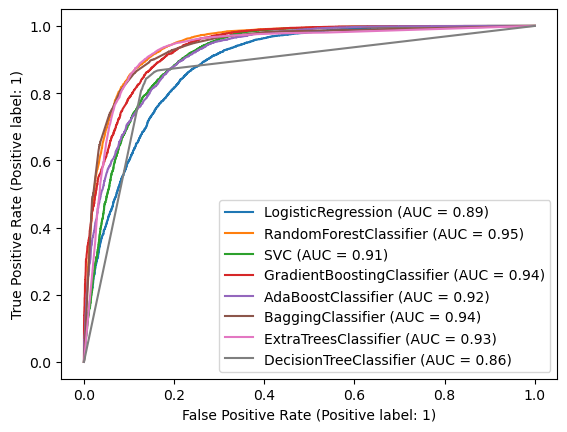

In [947]:
d=plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(rf,x_test,y_test,ax=d.ax_)

plot_roc_curve(sv,x_test,y_test,ax=d.ax_)

plot_roc_curve(gb,x_test,y_test,ax=d.ax_)

plot_roc_curve(ab,x_test,y_test,ax=d.ax_)

plot_roc_curve(bc,x_test,y_test,ax=d.ax_)

plot_roc_curve(et,x_test,y_test,ax=d.ax_)

plot_roc_curve(dt,x_test,y_test,ax=d.ax_)


plt.legend(prop={'size':10}, loc='lower right')

plt.show()

Here we choose Gradient bossting as our best model with good area under the curve with being generalised model without any sort of overfitting. In the case of Random forest,Bagging  & extra tree classifier we can see these are overfitted models as they do have good difference bw train & test accuracy.

# Saving model-

In [948]:
import joblib
joblib.dump(final_model,'Census Income-2')

['Census Income-2']

In [949]:
model=joblib.load('Census Income-2')

In [950]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 0, 1, 1])

In [951]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0              1         1
1              1         1
2              0         1
3              0         0
4              0         0
...          ...       ...
12968          1         1
12969          0         0
12970          0         0
12971          1         1
12972          1         1

[12973 rows x 2 columns]

# Plotting AUC & ROC curve-

In [952]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

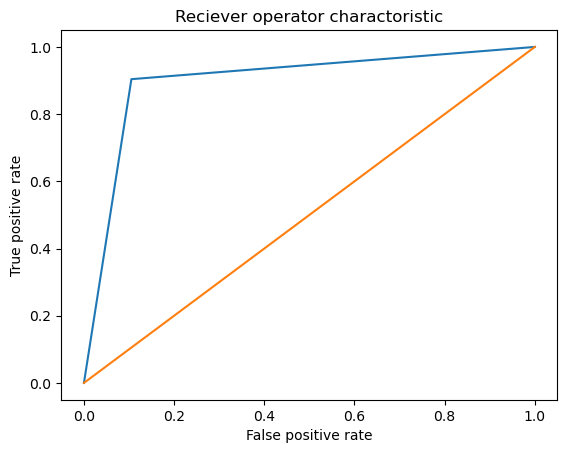

0.8994025310060794


In [953]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

Here we can see that the area under the curve is 90%

# Model-III(With Applying Principle Component Analysis)

In [1159]:
#Importing the data frame from the above after removal of outliers & skewness with encoding of object data.

In [1174]:
df

Age    Fnlwgt  Education_num  Sex  Capital_gain  Capital_loss  \
0      0.891733 -1.089960             13    1     -0.301491     -0.221299   
1      0.102259  0.398771              9    1     -0.301491     -0.221299   
2      1.064242  0.562562              7    1     -0.301491     -0.221299   
3     -0.732199  1.340353             13    0     -0.301491     -0.221299   
4      0.027550  0.957178             14    0     -0.301491     -0.221299   
...         ...       ...            ...  ...           ...           ...   
32554 -1.358807  1.144012             10    1     -0.301491     -0.221299   
32555 -0.828514  0.746761             12    0     -0.301491     -0.221299   
32556  0.246949 -0.193274              9    1     -0.301491     -0.221299   
32557  1.334550 -0.219732              9    0     -0.301491     -0.221299   
32558 -1.358807  0.271699              9    1     -0.301491     -0.221299   

       Hours_per_week  Income  Workclass_0  Workclass_1  ...  Relationship_2  \
0                  13       0            0            0  ...               1   
1                  40       0            0            0  ...               0   
2                  40       0            0            0  ...               1   
3                  40       0            0            0  ...               1   
4                  40       0            0            0  ...               1   
...               ...     ...          ...          ...  ...             ...   
32554              40       0            0            0  ...               0   
32555              38       0            0            0  ...               1   
32556              40       1            0            0  ...               1   
32557              40       0            0            0  ...               1   
32558              20       0            0            0  ...               0   

       Race_0  Race_1  Race_2  Native_country_0  Native_country_1  \
0           0       0       1                 0                 0   
1           0       0       1                 0                 0   
2           0       1       0                 0                 0   
3           0       1       0                 0                 0   
4           0       0       1                 0                 0   
...       ...     ...     ...               ...               ...   
32554       0       0       1                 0                 0   
32555       0       0       1                 0                 0   
32556       0       0       1                 0                 0   
32557       0       0       1                 0                 0   
32558       0       0       1                 0                 0   

       Native_country_2  Native_country_3  Native_country_4  Native_country_5  
0                     0                 0                 0                 1  
1                     0                 0                 0                 1  
2                     0                 0                 0                 1  
3                     0                 0                 1                 0  
4                     0                 0                 0                 1  
...                 ...               ...               ...               ...  
32554                 0                 0                 0                 1  
32555                 0                 0                 0                 1  
32556                 0                 0                 0                 1  
32557                 0                 0                 0                 1  
32558                 0                 0                 0                 1  

[26902 rows x 35 columns]

# Separating features and label-

In [1175]:
x=df.drop(columns=['Income'],axis=1)
y=df.Income

# Feature scaling-

In [1176]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Age    Fnlwgt  Education_num       Sex  Capital_gain  \
0      0.968395 -1.108958       1.278385  0.730942  5.551115e-17   
1      0.175915  0.449542      -0.553146  0.730942  5.551115e-17   
2      1.141562  0.621010      -1.468912  0.730942  5.551115e-17   
3     -0.661721  1.435253       1.278385 -1.368098  5.551115e-17   
4      0.100921  1.034119       1.736268 -1.368098  5.551115e-17   
...         ...       ...            ...       ...           ...   
26897 -1.290716  1.229710      -0.095263  0.730942  5.551115e-17   
26898 -0.758404  0.813841       0.820502 -1.368098  5.551115e-17   
26899  0.321155 -0.170248      -0.553146  0.730942  5.551115e-17   
26900  1.412899 -0.197947      -0.553146 -1.368098  5.551115e-17   
26901 -1.290716  0.316515      -0.553146  0.730942  5.551115e-17   

       Capital_loss  Hours_per_week  Workclass_0  Workclass_1  Workclass_2  \
0               0.0       -2.203294    -0.025146    -0.468382    -2.224075   
1               0.0       -0.004589    -0.025146    -0.468382     0.449625   
2               0.0       -0.004589    -0.025146    -0.468382     0.449625   
3               0.0       -0.004589    -0.025146    -0.468382     0.449625   
4               0.0       -0.004589    -0.025146    -0.468382     0.449625   
...             ...             ...          ...          ...          ...   
26897           0.0       -0.004589    -0.025146    -0.468382     0.449625   
26898           0.0       -0.167456    -0.025146    -0.468382     0.449625   
26899           0.0       -0.004589    -0.025146    -0.468382     0.449625   
26900           0.0       -0.004589    -0.025146    -0.468382     0.449625   
26901           0.0       -1.633260    -0.025146    -0.468382     0.449625   

       ...  Relationship_2    Race_0    Race_1    Race_2  Native_country_0  \
0      ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
1      ...       -1.068587 -0.133058 -0.387935  0.345713         -0.091838   
2      ...        0.935815 -0.133058  2.577748 -2.892575         -0.091838   
3      ...        0.935815 -0.133058  2.577748 -2.892575         -0.091838   
4      ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
...    ...             ...       ...       ...       ...               ...   
26897  ...       -1.068587 -0.133058 -0.387935  0.345713         -0.091838   
26898  ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
26899  ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
26900  ...        0.935815 -0.133058 -0.387935  0.345713         -0.091838   
26901  ...       -1.068587 -0.133058 -0.387935  0.345713         -0.091838   

       Native_country_1  Native_country_2  Native_country_3  Native_country_4  \
0             -0.144335         -0.212279         -0.230303         -0.188173   
1             -0.144335         -0.212279         -0.230303         -0.188173   
2             -0.144335         -0.212279         -0.230303         -0.188173   
3             -0.144335         -0.212279         -0.230303          5.314255   
4             -0.144335         -0.212279         -0.230303         -0.188173   
...                 ...               ...               ...               ...   
26897         -0.144335         -0.212279         -0.230303         -0.188173   
26898         -0.144335         -0.212279         -0.230303         -0.188173   
26899         -0.144335         -0.212279         -0.230303         -0.188173   
26900         -0.144335         -0.212279         -0.230303         -0.188173   
26901         -0.144335         -0.212279         -0.230303         -0.188173   

       Native_country_5  
0              0.222868  
1              0.222868  
2              0.222868  
3             -4.486954  
4              0.222868  
...                 ...  
26897          0.222868  
26898          0.222868  
26899          0.222868  
26900          0.222868  
26901          0.222868  

[26902 rows x 34 columns]

# Applying Principle component analysis-

In [1177]:
from sklearn.decomposition import PCA

In [1178]:
pca=PCA()
pca.fit_transform(x)

array([[-3.11227733e+00, -1.97087756e-01,  2.02835453e+00, ...,
        -6.89326772e-03, -7.91390186e-16, -4.59140683e-17],
       [ 8.36176576e-01, -6.91893047e-01,  2.31340878e-01, ...,
        -6.75960482e-02,  4.18703186e-17, -3.81587868e-16],
       [-1.08421592e+00,  5.08394092e-01, -1.62592815e+00, ...,
        -1.29203651e-01, -2.24593216e-15,  6.58359189e-16],
       ...,
       [-1.66960639e+00, -6.90784526e-01, -1.74694578e+00, ...,
         1.52330729e-02,  2.33662989e-17, -1.71305708e-18],
       [ 1.34953255e+00, -8.04053433e-01, -8.43629455e-01, ...,
         9.07151029e-01,  1.76496000e-17,  8.46986578e-18],
       [ 2.53715035e+00, -7.71966891e-01, -9.15918339e-01, ...,
        -3.91876335e-02,  2.68434060e-17,  6.21203307e-18]])

In [1179]:
#Lets check how much components required for model building which covers maximun variance-

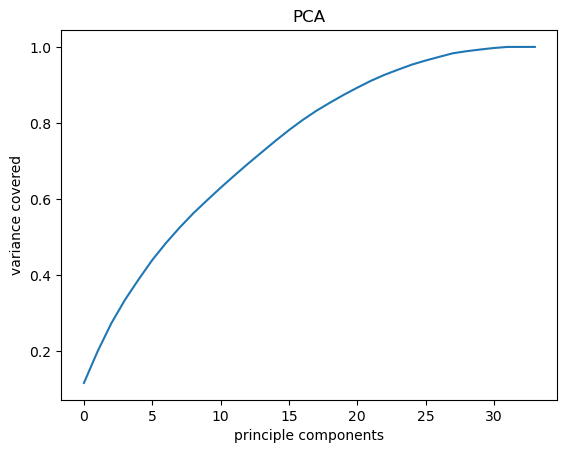

In [1180]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))  #cumulative sum  #this explained ratio will tell the correlation bw feature 
plt.xlabel('principle components') #and label for every component of feature i.e igon values or the distance.
plt.ylabel('variance covered')   
plt.title('PCA')
plt.show()

From this figure we can say that 30 Components will be enough which will cover maximum variance so lets build 30 component from the existing features.

In [1181]:
pca=PCA(n_components=30)
new_components=pca.fit_transform(x)

In [1182]:
princi_comp=pd.DataFrame(new_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])
princi_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -3.112277 -0.197088  2.028355  0.629646 -0.387603  0.815981 -0.749683   
1      0.836177 -0.691893  0.231341 -0.484052  1.561008 -1.632109  0.106902   
2     -1.084216  0.508394 -1.625928  1.017990 -3.462001 -1.659442 -0.514990   
3     -0.554913  5.695423  1.030659  0.345834 -2.495560 -2.010552 -0.079311   
4     -1.188313 -0.085314  1.178419 -0.872822 -0.028674 -1.397345  0.386920   
...         ...       ...       ...       ...       ...       ...       ...   
26897  2.190113 -0.735447 -0.535679 -0.648622  0.714078  0.510251  0.665731   
26898 -0.574079 -0.248787  0.413975 -0.977195 -0.194367 -0.257745  0.922587   
26899 -1.669606 -0.690785 -1.746946 -0.481195 -0.045526 -0.121696  2.237371   
26900  1.349533 -0.804053 -0.843629  0.445504  1.052897 -1.366267 -0.431076   
26901  2.537150 -0.771967 -0.915918 -0.841476 -0.227369  1.270729 -0.164470   

            PC8       PC9      PC10  ...      PC21      PC22      PC23  \
0      0.966622 -0.023146  0.236544  ...  1.831244  0.264505 -0.333627   
1     -0.560473  0.654844 -0.410531  ...  1.243431  0.388769 -0.625844   
2     -0.819374  0.302996 -0.448786  ...  1.095466  0.141075 -0.178541   
3     -0.540134 -0.767190 -0.551814  ...  1.010077 -3.546571 -2.137841   
4     -0.141003 -2.050785 -0.226007  ...  0.364982  0.329955 -0.095974   
...         ...       ...       ...  ...       ...       ...       ...   
26897 -2.453474 -0.340930 -0.682911  ... -0.840558 -0.218241 -0.148741   
26898 -0.676535 -1.251742 -0.261298  ... -0.088804  0.444079 -1.368693   
26899  0.004195  0.119229 -0.249757  ...  0.593185  0.096752 -0.033818   
26900  2.637271  0.030842 -0.150642  ...  0.024306 -0.232265  1.582668   
26901  0.545514  0.153836 -0.376508  ...  0.238171 -0.093775  0.132376   

           PC24      PC25      PC26      PC27      PC28      PC29      PC30  
0      0.096354  0.237546 -0.045651 -0.511683  0.021575 -0.012483 -0.084595  
1     -0.908122 -0.674657 -0.090656 -0.063303 -0.130509  0.001027  0.020549  
2      1.149210 -1.530026  0.096877  0.054298 -0.030560  0.049898 -0.308553  
3     -0.111303  0.553682 -2.277561 -0.261109  0.175068 -0.031034  0.539502  
4     -0.830758  0.152139 -0.222277 -0.444008 -0.473168  0.100279  0.786852  
...         ...       ...       ...       ...       ...       ...       ...  
26897 -0.158654  0.535331  0.109458  0.051950  0.341840 -0.528971  0.188537  
26898  1.163023  0.508424  0.269425  0.266049  1.149926 -0.079477  0.805938  
26899 -0.239948  0.322746 -0.023622 -0.121147  0.033752 -0.022517 -0.127075  
26900  0.215338  0.059766 -0.016452 -0.068737 -0.015714 -0.888484  0.256415  
26901 -0.774646  0.073192 -0.058491  0.034031 -0.009295  0.167777  0.038628  

[26902 rows x 30 columns]

Here we have made 30 components from the existing features.

# Handling class imbalance with Oversampling method-

In [1183]:
y.value_counts()

0    21621
1     5281
Name: Income, dtype: int64

Here we can see the data is not balanced, since it is a classification problem we will balance the data using oversampling method-

In [1184]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
princi_comp,y=sm.fit_resample(x,y)

In [1185]:
y.value_counts()

0    21621
1    21621
Name: Income, dtype: int64

Now the data is balanced.now we can build machine learning classification models-

# Model building-

In [1186]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [1187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs)  

Best accuracy is 0.8995606259153627 at random state 119


Here we got 90% accuracy at random state of 119 so we will move forward in model building on the same random state

In [1188]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=.30, random_state=maxrs)

Splitted the data set into train & test on same random state-

In [1189]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

# logistic regression-

In [1190]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [1191]:
metric_score(lr,x_train,x_test,y_train,y_test, train=True)
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 81.28%
/n=====================Test Result=====================
accuracy_score: 81.65%
confusion matrix is: 
[[4931 1538]
 [ 842 5662]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.76      0.81      6469
           1       0.79      0.87      0.83      6504

    accuracy                           0.82     12973
   macro avg       0.82      0.82      0.82     12973
weighted avg       0.82      0.82      0.82     12973



For Logistic regression i got train accuracy-81% & test accuracy-82% with F1 score is also 82% which is looking like a underfitted model.

In [1192]:
#Cross validation score-

In [1193]:
score=cross_val_score(lr,princi_comp,y)
print(score)
print(score.mean())

[0.80506417 0.81142329 0.81325162 0.81394542 0.82146161]
0.8130292209191674


The cross validation score for logistic regression is 81%

# Random forest-

In [1194]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [1195]:
metric_score(rf,x_train,x_test,y_train,y_test, train=True)
metric_score(rf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 89.55%
confusion matrix is: 
[[5650  819]
 [ 537 5967]]


 Test classification report
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      6469
           1       0.88      0.92      0.90      6504

    accuracy                           0.90     12973
   macro avg       0.90      0.90      0.90     12973
weighted avg       0.90      0.90      0.90     12973



For Random forest train accuracy-100% & test accuracy is-90% F1 score- 90% which looks like an overfitted model.

In [1196]:
#Cross validation score-

In [1197]:
score=cross_val_score(rf,princi_comp,y)
print(score)
print(score.mean())

[0.82714765 0.90183836 0.91836263 0.92379741 0.91801573]
0.897832354625117


The cross validation score for random forest is 90%.

# SupportVectorClassifier-

In [1198]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [1199]:
metric_score(sv,x_train,x_test,y_train,y_test, train=True)
metric_score(sv,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 85.86%
/n=====================Test Result=====================
accuracy_score: 84.68%
confusion matrix is: 
[[5057 1412]
 [ 575 5929]]


 Test classification report
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      6469
           1       0.81      0.91      0.86      6504

    accuracy                           0.85     12973
   macro avg       0.85      0.85      0.85     12973
weighted avg       0.85      0.85      0.85     12973



For support vector classifier train accuracy-86% & test accuracy-85% and F1 score-85% which looks like an generalised model.

In [1200]:
#Cross validation score-

In [1201]:
score=cross_val_score(sv,princi_comp,y)
print(score)
print(score.mean())

[0.82749451 0.84472193 0.85083256 0.85222017 0.85626735]
0.8463073030425253


The cross validation score for support vector classifier is 85%.

# GradientBoostingClassifier-

In [1202]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [1203]:
metric_score(gb,x_train,x_test,y_train,y_test, train=True)
metric_score(gb,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 86.40%
/n=====================Test Result=====================
accuracy_score: 86.65%
confusion matrix is: 
[[5292 1177]
 [ 555 5949]]


 Test classification report
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      6469
           1       0.83      0.91      0.87      6504

    accuracy                           0.87     12973
   macro avg       0.87      0.87      0.87     12973
weighted avg       0.87      0.87      0.87     12973



For Grdient boosting classifier train accuracy-86% & test accuracy-87% with F1 score-87% looks like a generalised model with low bias & low variance.

In [1204]:
#Cross validation score-

In [1205]:
score=cross_val_score(gb,princi_comp,y)
print(score)
print(score.mean())

[0.78621806 0.86310556 0.8756938  0.87673451 0.87835338]
0.8560210609708319


The cross validation score for Gradient boosting classifier is 86%.

# AdaBoostClassifier-

In [1206]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [1207]:
metric_score(ab,x_train,x_test,y_train,y_test, train=True)
metric_score(ab,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 83.87%
/n=====================Test Result=====================
accuracy_score: 84.30%
confusion matrix is: 
[[5129 1340]
 [ 697 5807]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      6469
           1       0.81      0.89      0.85      6504

    accuracy                           0.84     12973
   macro avg       0.85      0.84      0.84     12973
weighted avg       0.85      0.84      0.84     12973



For Ada boost classfier train accuracy-84% & test accuracy-84% with F1 score-84% looks like a generalised model.

In [1208]:
#Cross validation score-

In [1209]:
score=cross_val_score(ab,princi_comp,y)
print(score)
print(score.mean())

[0.78691178 0.84217829 0.85002313 0.84956059 0.85152636]
0.8360400302944446


The cross validation score for ada boost classifier is 84%

# BaggingClassifier-

In [1210]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [1211]:
metric_score(bc,x_train,x_test,y_train,y_test, train=True)
metric_score(bc,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 99.30%
/n=====================Test Result=====================
accuracy_score: 86.97%
confusion matrix is: 
[[5668  801]
 [ 889 5615]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6469
           1       0.88      0.86      0.87      6504

    accuracy                           0.87     12973
   macro avg       0.87      0.87      0.87     12973
weighted avg       0.87      0.87      0.87     12973



For bagging classifier train accuracy-99% & test accuracy-87% with F1 score-87% which is looking like overfitted model as there is a big difference bw train & test accuracy.

In [1212]:
#Cross validation score-

In [1213]:
score=cross_val_score(bc,princi_comp,y)
print(score)
print(score.mean())

[0.74598219 0.88703896 0.90691489 0.90703053 0.9083025 ]
0.8710538154218661


The cross validation score for bagging classifier is 87%

# ExtraTreeClassifier-

In [1214]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [1215]:
metric_score(et,x_train,x_test,y_train,y_test, train=True)
metric_score(et,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 90.15%
confusion matrix is: 
[[5640  829]
 [ 449 6055]]


 Test classification report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      6469
           1       0.88      0.93      0.90      6504

    accuracy                           0.90     12973
   macro avg       0.90      0.90      0.90     12973
weighted avg       0.90      0.90      0.90     12973



for extra tree classfier train accuracy-100% test accuracy-90% with F1 score-90% which is looking like overfitted model as training accuracy is 100%.

In [1216]:
#Cross validation score-

In [1217]:
score=cross_val_score(et,princi_comp,y)
print(score)
print(score.mean())

[0.8621806  0.90669442 0.91905643 0.92148474 0.9199815 ]
0.9058795357304705


The cross validation score for extra tree classfier is 91%.

# Decision Tree Classifier-

In [1218]:
from sklearn.tree import DecisionTreeClassifier

In [1219]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [1220]:
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 83.96%
confusion matrix is: 
[[5423 1046]
 [1035 5469]]


 Test classification report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      6469
           1       0.84      0.84      0.84      6504

    accuracy                           0.84     12973
   macro avg       0.84      0.84      0.84     12973
weighted avg       0.84      0.84      0.84     12973



For decision tree train accuracy-100% test accuracy-84% which is looking like overfitted model as training accuracy is 100%.

In [1221]:
#Cross validation score-

In [1222]:
score=cross_val_score(dt,princi_comp,y)
print(score)
print(score.mean())

[0.73025783 0.84691872 0.86759944 0.87014339 0.87268733]
0.8375213418928723


The cross validation score for decision tree is 84%.

# Selection of best model-

Here we can see that our best performing model is Gradient boosting classifier as it is giving us train accuracy of 86% and test accuracy of 87% with F1 score of 87% and cross validation score of 86%. as this is class imbalance problem so here to measure the performance of the model we are taking care of the difference bw the F1score and test accuracy. so Gradient boosting classifier model is giving us the best accuracy with least difference bw F1score & its test accuracy.

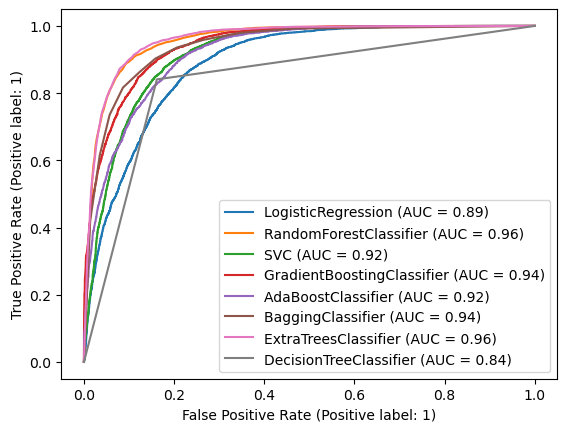

In [1223]:
d=plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(rf,x_test,y_test,ax=d.ax_)

plot_roc_curve(sv,x_test,y_test,ax=d.ax_)

plot_roc_curve(gb,x_test,y_test,ax=d.ax_)

plot_roc_curve(ab,x_test,y_test,ax=d.ax_)

plot_roc_curve(bc,x_test,y_test,ax=d.ax_)

plot_roc_curve(et,x_test,y_test,ax=d.ax_)

plot_roc_curve(dt,x_test,y_test,ax=d.ax_)


plt.legend(prop={'size':10}, loc='lower right')

plt.show()

Here we can see that Gradient boosting classifier is performing best here which is giving us 94 area under the curve by being a generalised model and other models like Random forest classifier,Bagging classifier & Extra tree classifier have overfitting thats why we are chossing Gradient boosting classifier as our best generalised model. 

# Hypertunning parameters-

In [1224]:
from sklearn.model_selection import RandomizedSearchCV

In [1226]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss':['deviance', 'exponential'],'random_state':[10,20,40],'max_depth':[5,7,9,11,13],
            'n_estimators':[200,300,400],'min_samples_leaf':[2,3]}

In [1227]:
gs=RandomizedSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [1228]:
gs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [5, 7, 9, 11, 13],
                                        'min_samples_leaf': [2, 3],
                                        'n_estimators': [200, 300, 400],
                                        'random_state': [10, 20, 40]})

In [1229]:
gs.best_params_

{'random_state': 40,
 'n_estimators': 400,
 'min_samples_leaf': 2,
 'max_depth': 11,
 'loss': 'exponential',
 'criterion': 'squared_error'}

In [1230]:
final_model=GradientBoostingClassifier(criterion='squared_error',max_depth=11,loss='exponential',n_estimators=400,min_samples_leaf=2,random_state=40)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)

In [1231]:
accuracy_score(y_test,pred)

0.9051106143528868

So for Ada boost classifier model accuracy is increased to 91% With the help of Randomized search search cv method.

# Saving model-

In [1232]:
import joblib
joblib.dump(final_model,'Census income-3')

['Census income-3']

In [1233]:
model=joblib.load('Census income-3')

In [1234]:
#Lets predict with our model-

In [1235]:
prediction=model.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [1236]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0              0         0
1              1         1
2              1         1
3              0         0
4              1         1
...          ...       ...
12968          0         0
12969          0         0
12970          0         0
12971          1         1
12972          1         1

[12973 rows x 2 columns]

# Plotting AUC & ROC curve-

In [1237]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

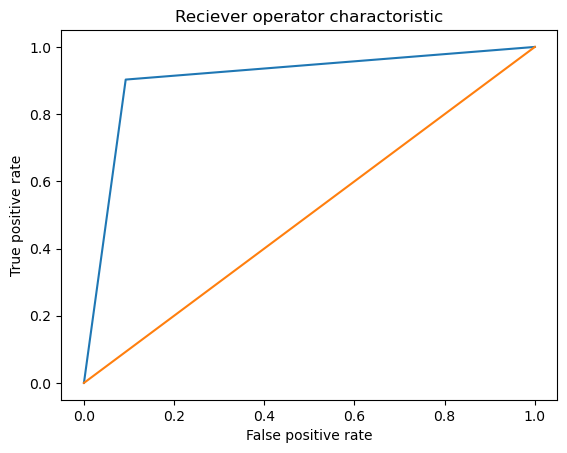

0.9051167865210883


In [1238]:
fpr,tpr,threshold=roc_curve(y_test,final_model.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print(auc_score)

So for Adaboost classifier model the area under the curve is 90.5%

# Conclusion- 

Here we have made 3 models with this data set.

1. Model-I with Gradient boosting classifier with 90% accuracy.
2. Model-I with Gradient boosting classifier with 90% accuracy.
3. Model-I with Gradient boosting classifier with 91% accuracy.